# NIFTY-50 ANALYSIS


In [1]:
import numpy as np
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting
from IPython import display
from ipywidgets import interact,widgets 
%matplotlib inline
import re
import mailbox
import csv
import seaborn as sns

In [2]:
data=pd.read_csv("/Users/sakshiashutosh/Downloads/National_Stock_Exchange_of_India_Ltd.csv")

In [3]:
data.describe

<bound method NDFrame.describe of         Symbol       Open       High        Low        LTP    Chng  % Chng  \
0   ADANIPORTS        750        766     713.25        715  -47.45   -6.22   
1   ASIANPAINT   3,101.00   3,167.35   3,091.00   3,138.00   -6.25   -0.20   
2     AXISBANK        669      674.9     660.45        661  -18.90   -2.78   
3   BAJAJ-AUTO   3,370.00   3,383.50   3,320.00   3,335.00  -56.70   -1.67   
4   BAJAJFINSV  17,200.00  17,237.20  16,610.00  16,684.00 -684.85   -3.94   
5   BAJFINANCE   7,021.00   7,047.90   6,775.00   6,780.00 -345.80   -4.85   
6   BHARTIARTL        763        763      733.1     735.85  -29.30   -3.83   
7         BPCL     397.15      397.2        375      377.4  -22.70   -5.67   
8    BRITANNIA   3,560.00   3,635.10   3,533.95   3,566.60   -6.80   -0.19   
9        CIPLA        892     976.05     890.65        965   65.05    7.23   
10   COALINDIA     157.75      159.4     155.35      155.9   -2.65   -1.67   
11    DIVISLAB   4,770.00   5,

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB


In [5]:
data.columns

Index(['Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', '% Chng',
       'Volume (lacs)', 'Turnover (crs.)', '52w H', '52w L', '365 d % chng',
       '30 d % chng'],
      dtype='object')

In [125]:
data.rename(columns={'% Chng':'percent_change','Volume (lacs)':'volume_in_lakhs','Turnover (crs.)':'Turnover_in_crores',
                    '52w H':'52weeks_high','52w L':'52weeks_low','365 d % chng':'365day_percent_change',
                    '30 d % chng':'30day_percent_change'},inplace=True)

In [7]:
data['Open']=data["Open"].str.replace(',',"").astype('float64')

In [8]:
data['High']=data["High"].str.replace(',',"").astype('float64')

In [9]:
data['Low']=data["Low"].str.replace(',',"").astype('float64')

In [10]:
data['LTP']=data["LTP"].str.replace(',',"").astype('float64')

In [11]:
data['Turnover (crs.)']=data["Turnover (crs.)"].str.replace(',',"").astype('float64')

In [12]:
data['52w H']=data["52w H"].str.replace(',',"").astype('float64')


In [13]:
data['52w L']=data["52w L"].str.replace(',',"").astype('float64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     float64
 2   High             50 non-null     float64
 3   Low              50 non-null     float64
 4   LTP              50 non-null     float64
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     float64
 9   52w H            50 non-null     float64
 10  52w L            50 non-null     float64
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.2+ KB


In [165]:
data

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
0,ADANIPORTS,750.00,766.00,713.25,715.00,-47.45,-6.22,72.20,532.63,901.00,384.40,79.22,-4.65
1,ASIANPAINT,3101.00,3167.35,3091.00,3138.00,-6.25,-0.20,10.29,322.53,3505.00,2117.15,45.66,5.66
2,AXISBANK,669.00,674.90,660.45,661.00,-18.90,-2.78,102.53,684.00,866.90,568.40,10.19,-21.49
3,BAJAJ-AUTO,3370.00,3383.50,3320.00,3335.00,-56.70,-1.67,3.42,114.59,4361.40,3041.00,9.30,-12.05
4,BAJAJFINSV,17200.00,17237.20,16610.00,16684.00,-684.85,-3.94,3.42,576.79,19325.00,8273.70,91.38,-9.10
5,BAJFINANCE,7021.00,7047.90,6775.00,6780.00,-345.80,-4.85,16.89,1161.63,8050.00,4362.00,44.57,-13.69
6,BHARTIARTL,763.00,763.00,733.10,735.85,-29.30,-3.83,111.43,830.06,781.80,454.11,58.55,5.70
7,BPCL,397.15,397.20,375.00,377.40,-22.70,-5.67,100.23,383.54,503.00,357.00,-1.22,-12.45
8,BRITANNIA,3560.00,3635.10,3533.95,3566.60,-6.80,-0.19,3.73,133.23,4153.00,3317.30,0.30,-3.42
9,CIPLA,892.00,976.05,890.65,965.00,65.05,7.23,144.59,1380.90,1005.00,726.50,31.89,6.34


## 50 Companies symbol with their open stock price rate

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


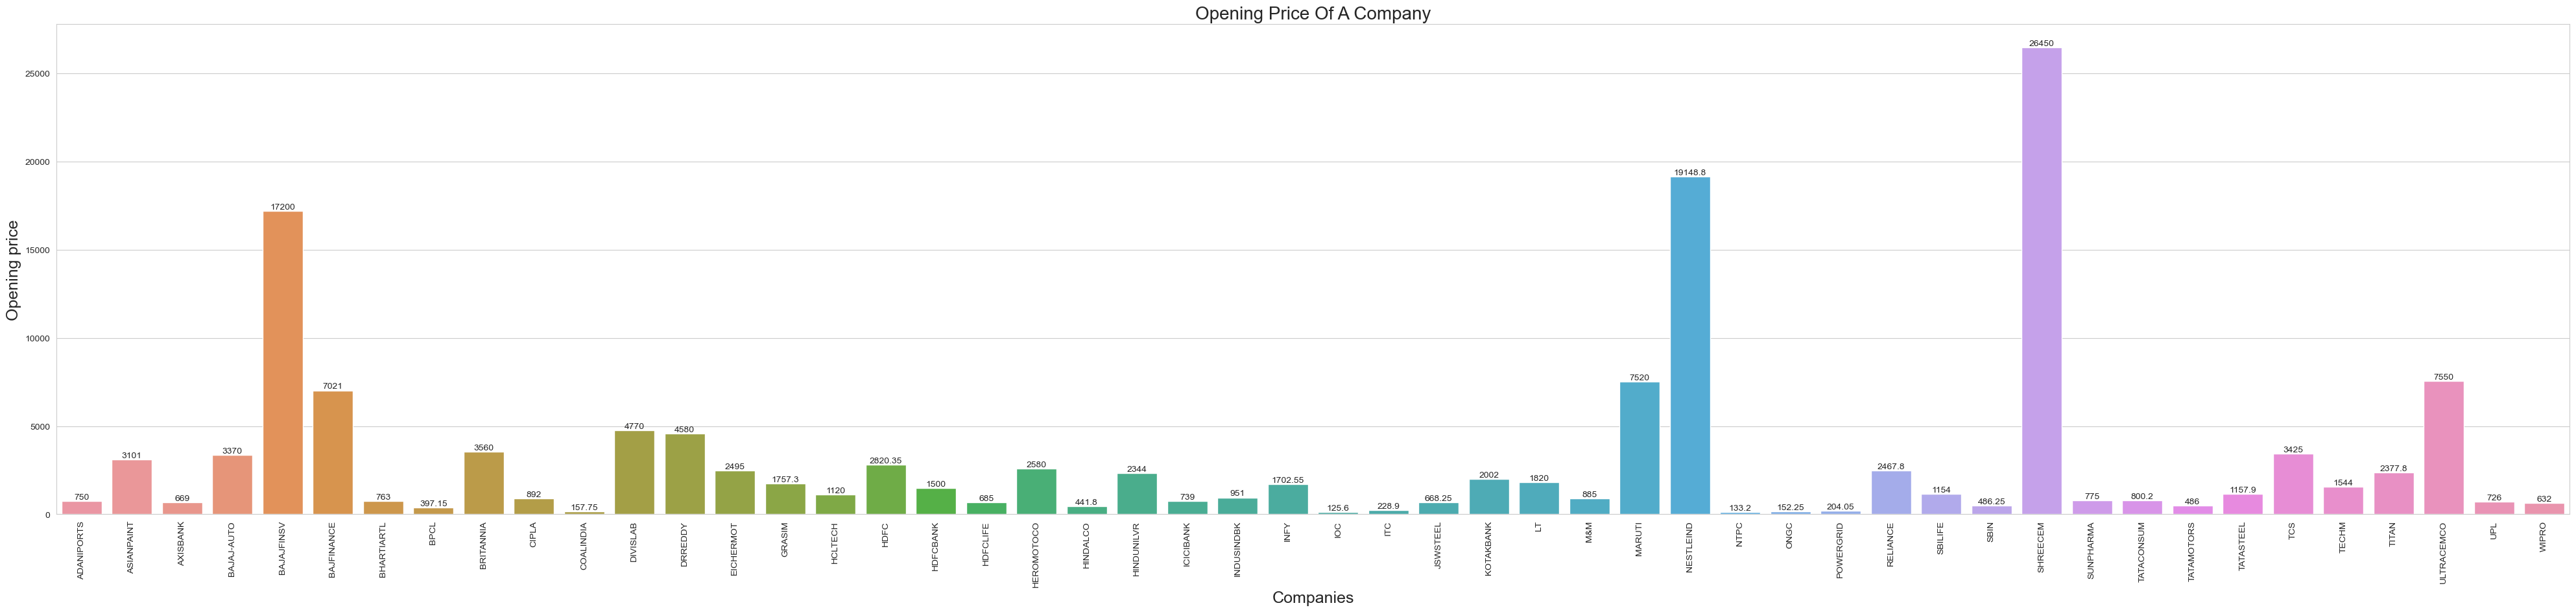

In [170]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(data.Symbol,data.Open)
plt.xticks(rotation=90)
plt.ylabel("Opening price",fontsize=18)
plt.xlabel("Companies",fontsize=18)
plt.title("Opening Price Of A Company",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)


In [28]:
data.Open.sort_values(ascending=True).head(5)

25    125.60
33    133.20
34    152.25
10    157.75
35    204.05
Name: Open, dtype: float64

In [38]:

import pandas as pd
min_open=data.loc[[25,33,34,10,35]]

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


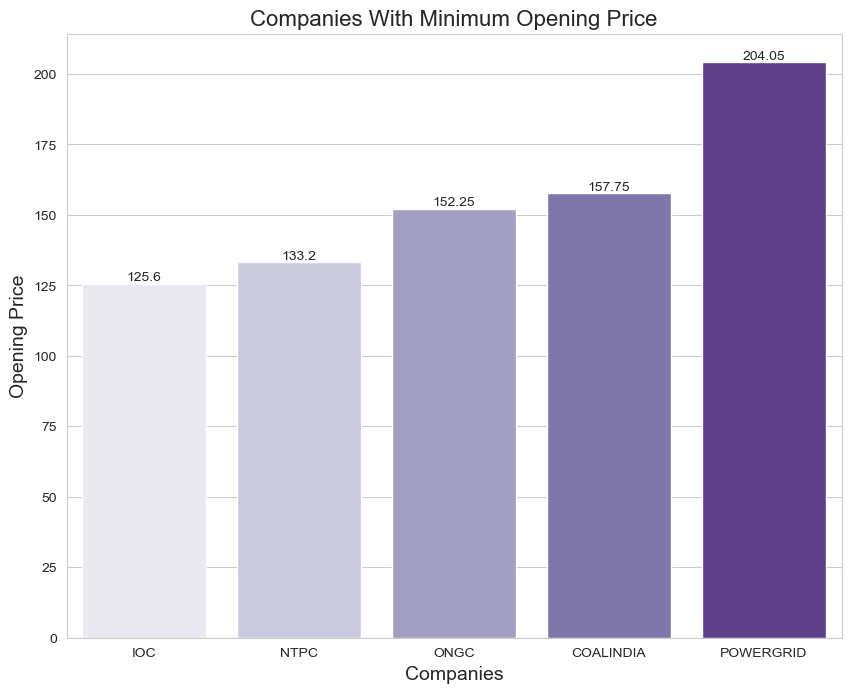

In [228]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(min_open.Symbol,min_open.Open,palette="Purples")
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Opening Price",fontsize=14)
plt.title("Companies With Minimum Opening Price",fontsize=16)
for i in ax.containers:
    ax.bar_label(i)


In [48]:
data.Open.sort_values(ascending=True).tail(5)

31     7520.00
47     7550.00
4     17200.00
32    19148.85
39    26450.00
Name: Open, dtype: float64

In [52]:
max_open=data.loc[[31,47,4,32,39]]

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


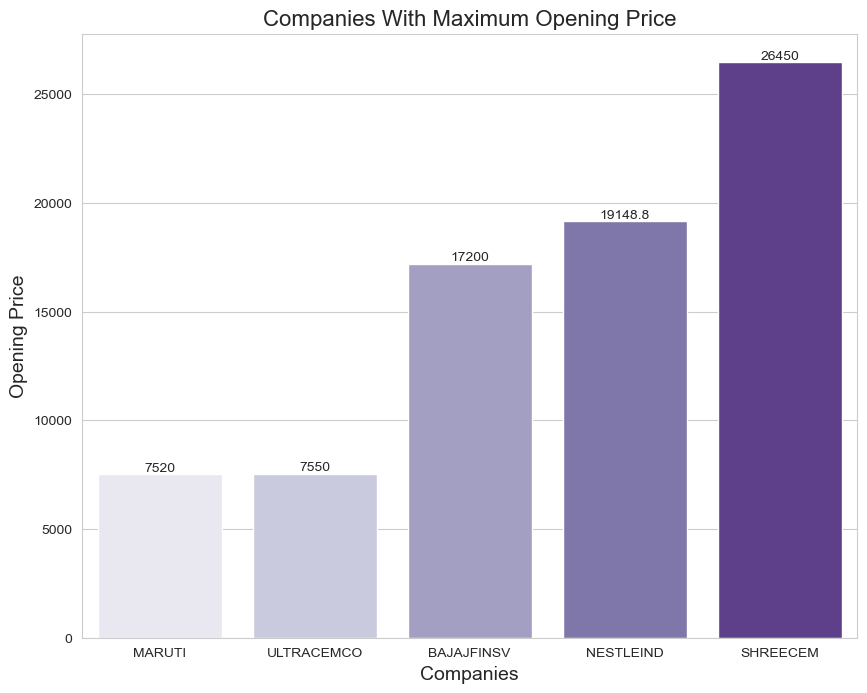

In [227]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_open.Symbol,max_open.Open,palette="Purples")
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Opening Price",fontsize=14)
plt.title("Companies With Maximum Opening Price",fontsize=16)

for i in ax.containers:
    ax.bar_label(i)


## 50 Companies symbol with their high stock price rate

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


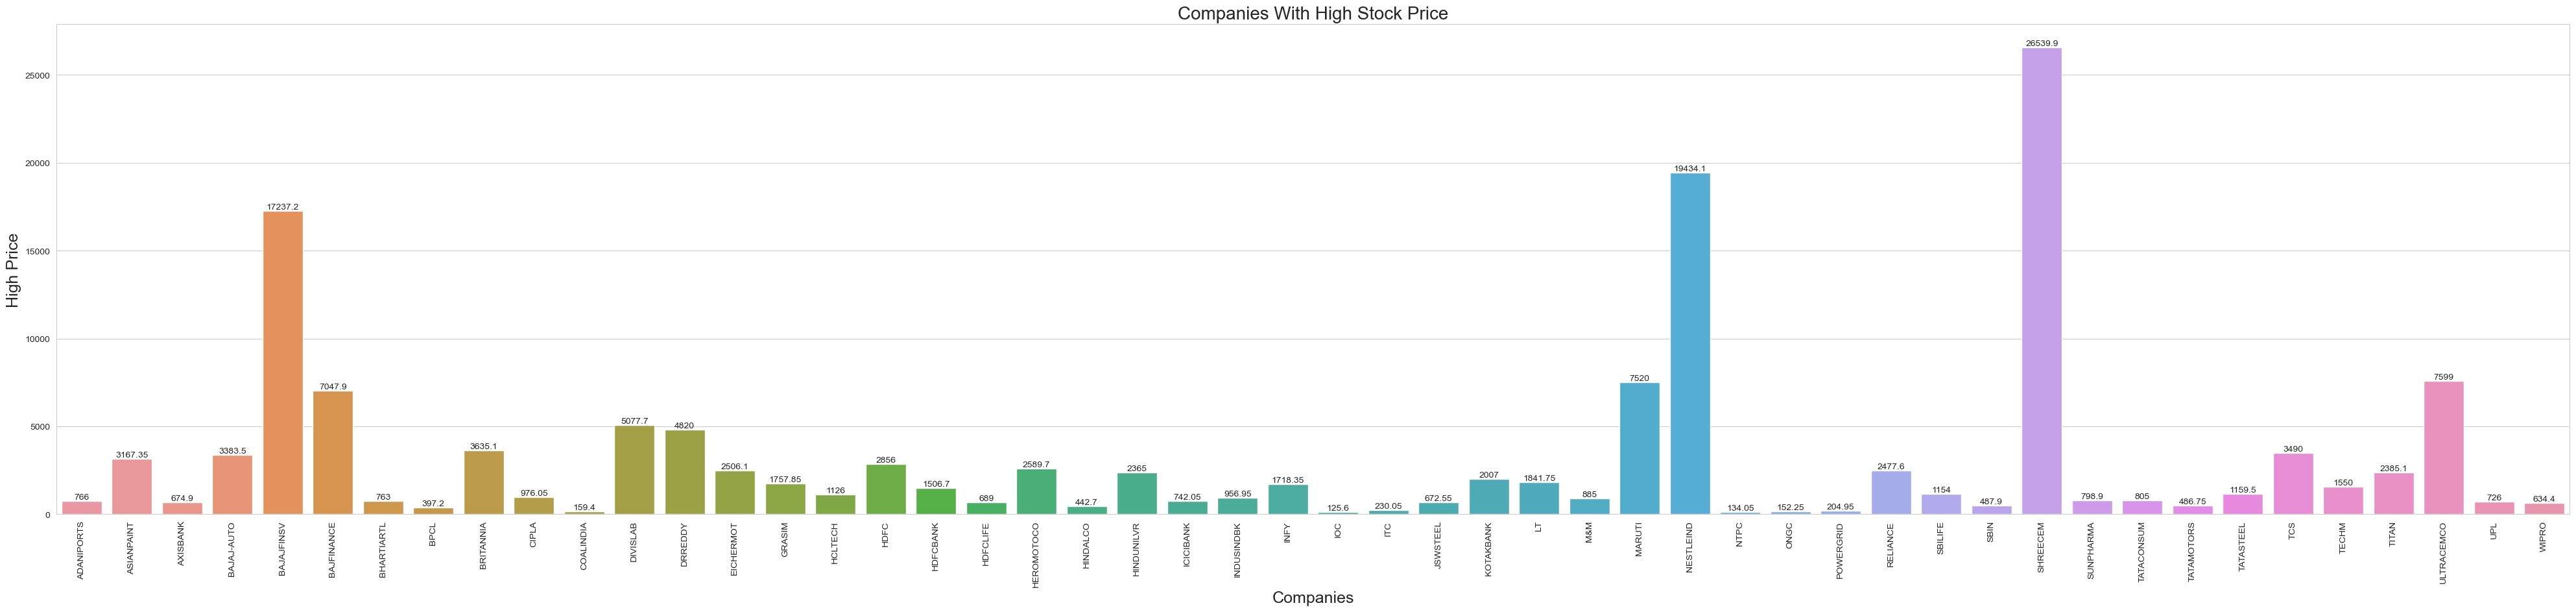

In [174]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(data.Symbol,data.High)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("High Price",fontsize=18)
plt.title("Companies With High Stock Price",fontsize=20)

plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)


In [58]:
data.High.sort_values(ascending=True).head()

25    125.60
33    134.05
34    152.25
10    159.40
35    204.95
Name: High, dtype: float64

In [59]:
min_high=data.loc[[25,33,34,10,35]]

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


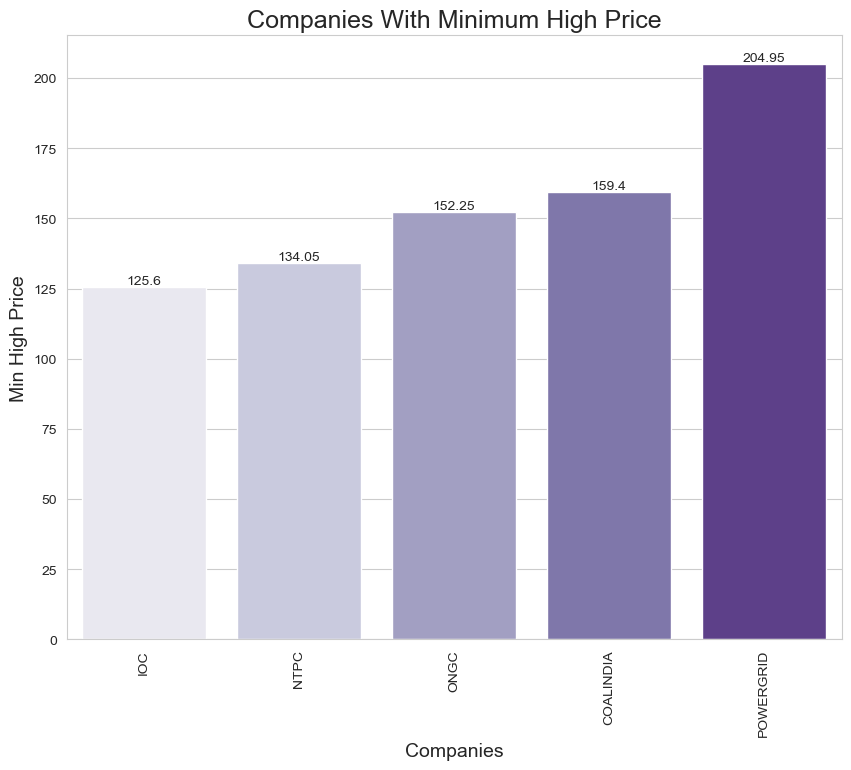

In [226]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(min_high.Symbol,min_high.High,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Min High Price",fontsize=14)
plt.title("Companies With Minimum High Price",fontsize=18)


for i in ax.containers:
    ax.bar_label(i)



In [63]:
data.High.sort_values(ascending=True).tail()

31     7520.0
47     7599.0
4     17237.2
32    19434.1
39    26539.9
Name: High, dtype: float64

In [64]:
max_high=data.loc[[31,47,4,32,39]]

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


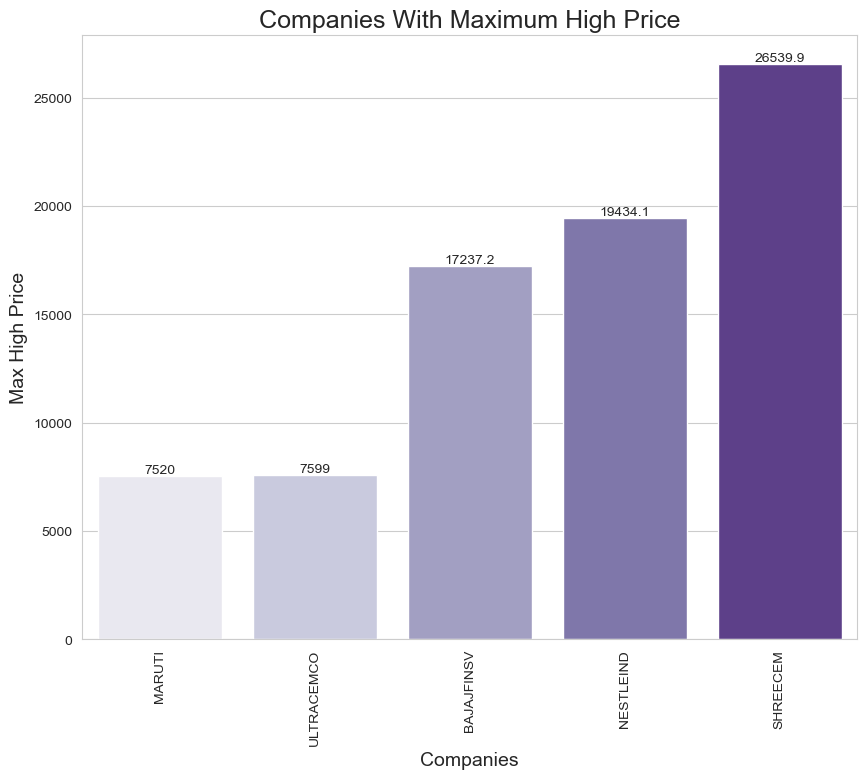

In [177]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_high.Symbol,max_high.High,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max High Price",fontsize=14)
plt.title("Companies With Maximum High Price",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies symbol with their low stock price rate

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


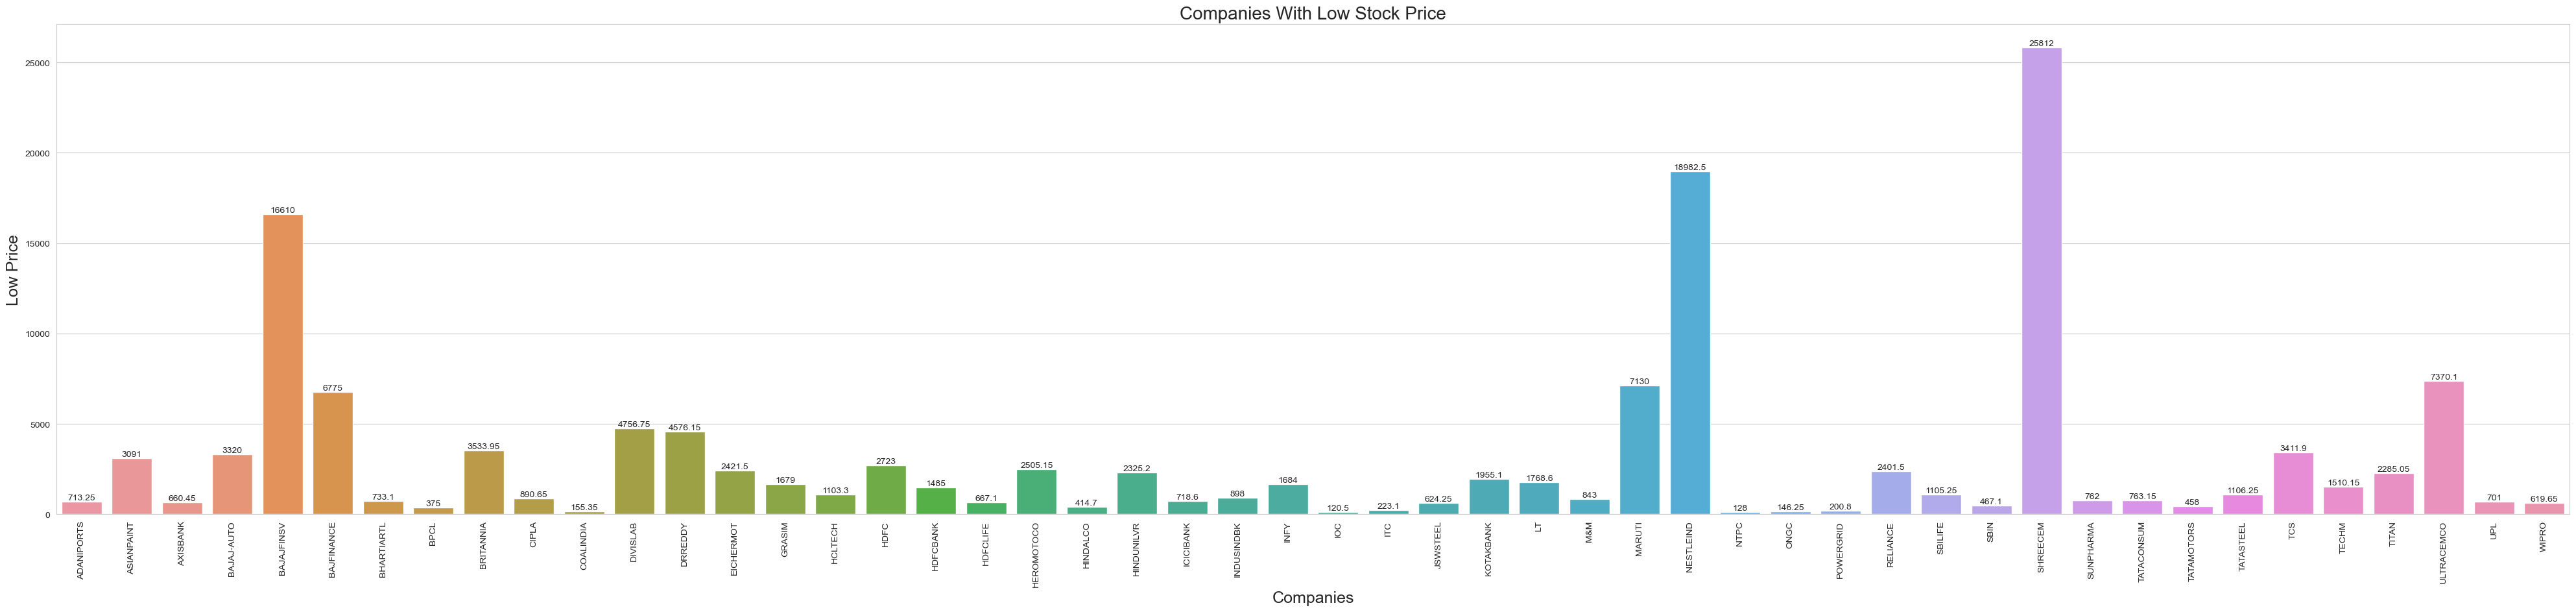

In [179]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(data.Symbol,data.Low)
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("Low Price",fontsize=18)
plt.title("Companies With Low Stock Price",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)


In [67]:
data.Low.sort_values(ascending=True).head()

25    120.50
33    128.00
34    146.25
10    155.35
35    200.80
Name: Low, dtype: float64

In [68]:
min_low=data.loc[[25,33,34,10,35]]

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


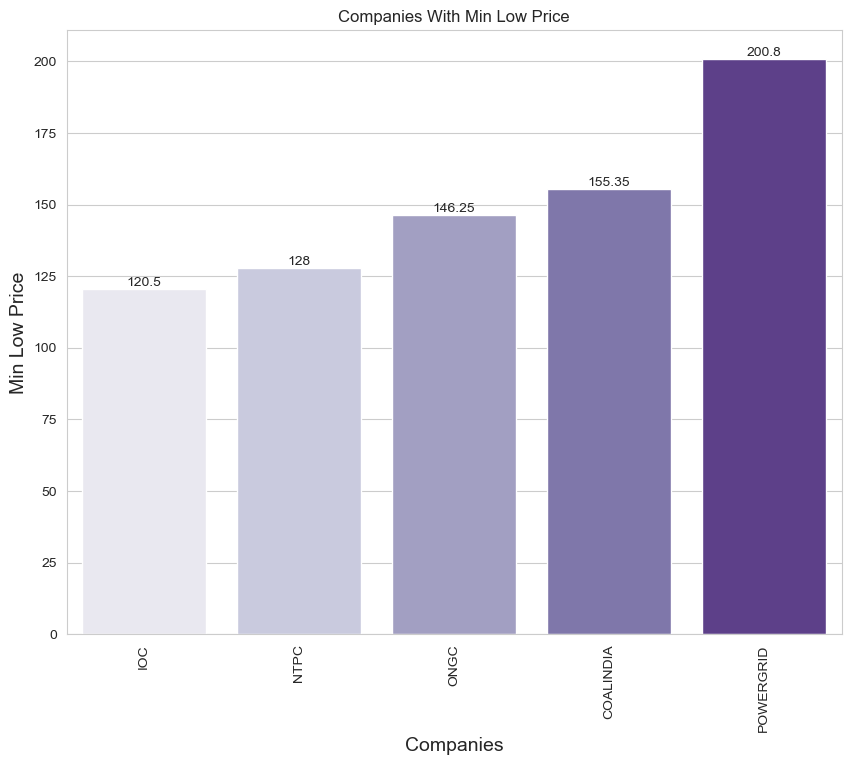

In [180]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(min_low.Symbol,min_low.Low,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Min Low Price",fontsize=14)
plt.title("Companies With Min Low Price")
for i in ax.containers:
    ax.bar_label(i)

In [70]:
data.Low.sort_values(ascending=True).tail()

31     7130.0
47     7370.1
4     16610.0
32    18982.5
39    25812.0
Name: Low, dtype: float64

In [71]:
max_low=data.loc[[31,47,4,32,39]]

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


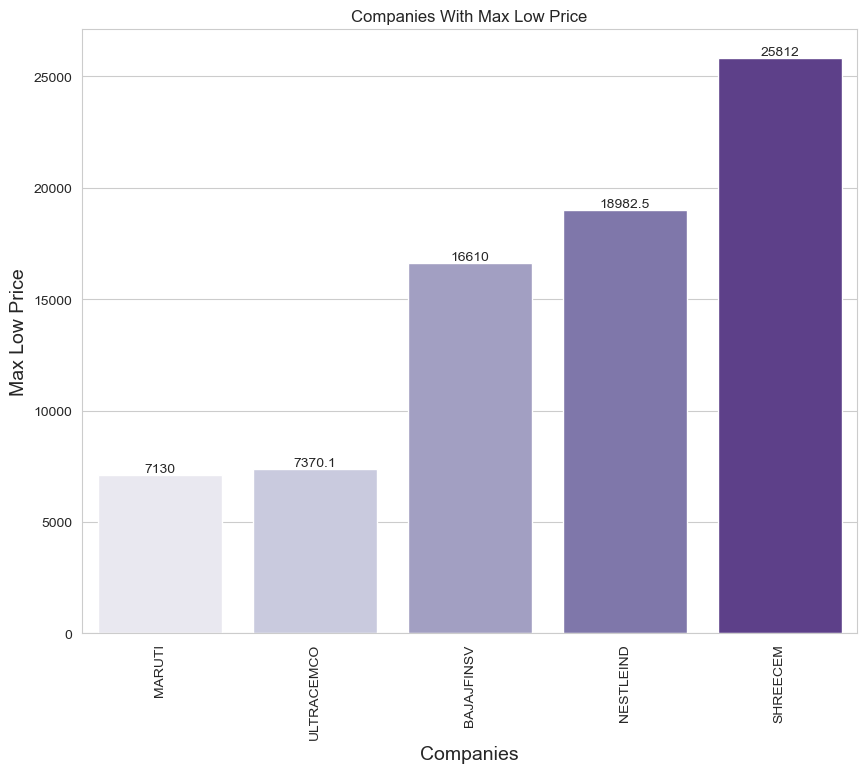

In [181]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_low.Symbol,max_low.Low,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max Low Price",fontsize=14)
plt.title("Companies With Max Low Price")

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies symbol with their LTP (Latest Trading Price)

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


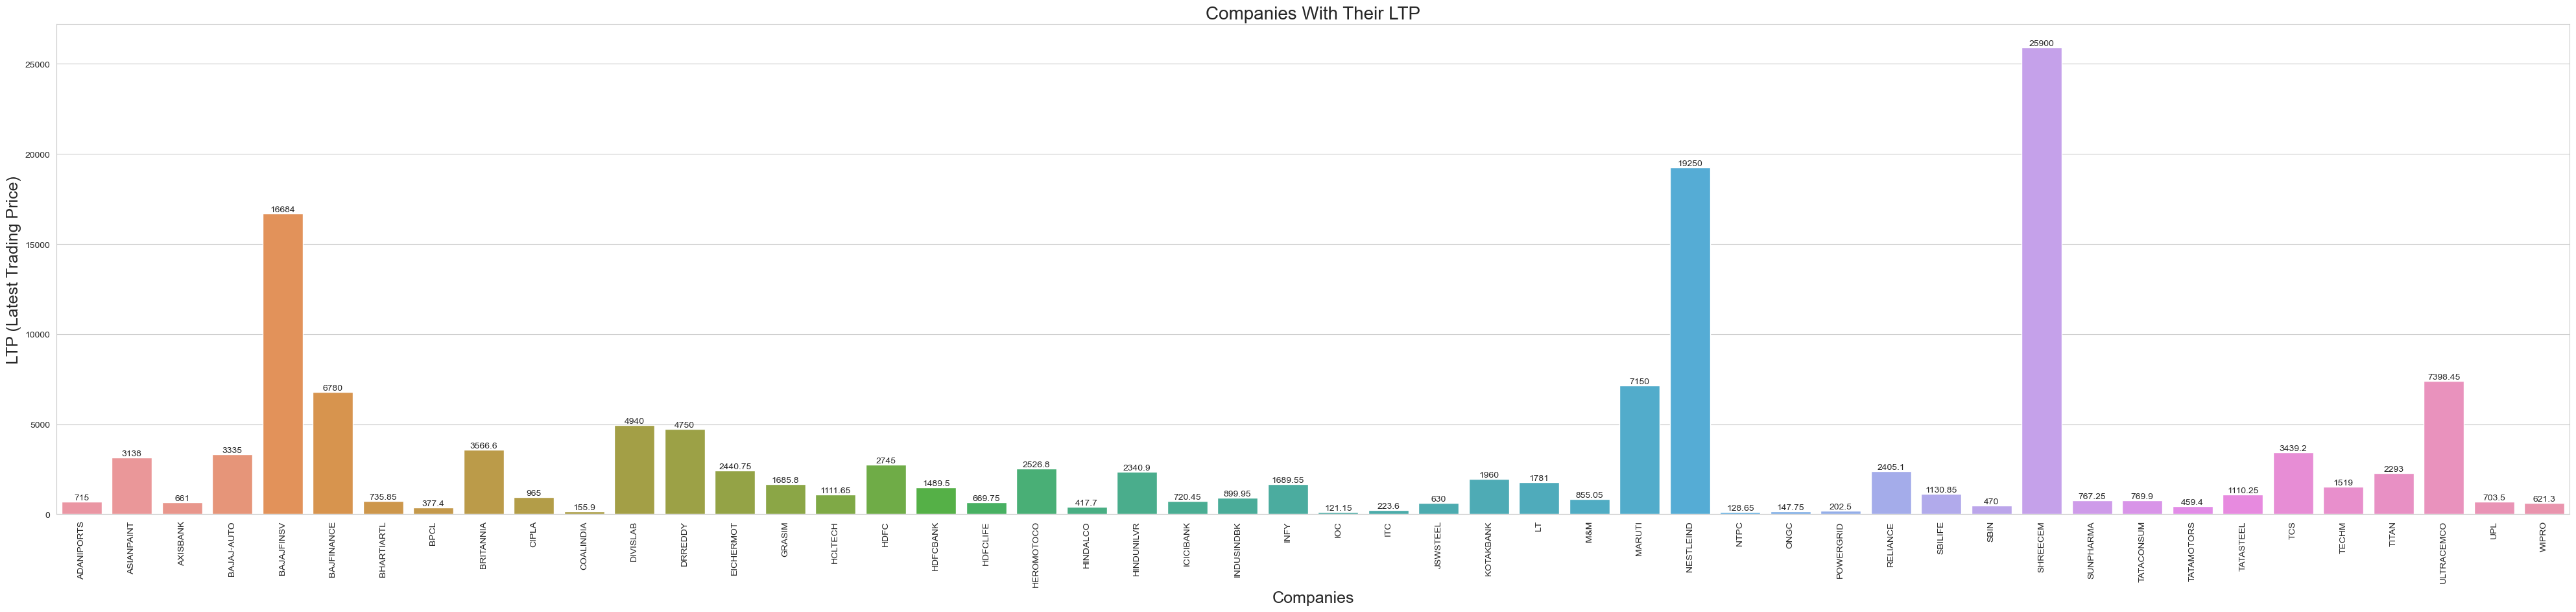

In [183]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(data.Symbol,data.LTP)
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("LTP (Latest Trading Price)",fontsize=18)
plt.title("Companies With Their LTP",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)


In [74]:
data.LTP.sort_values(ascending=True).head()

25    121.15
33    128.65
34    147.75
10    155.90
35    202.50
Name: LTP, dtype: float64

In [75]:
min_LTP=data.loc[[25,33,34,10,35]]

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


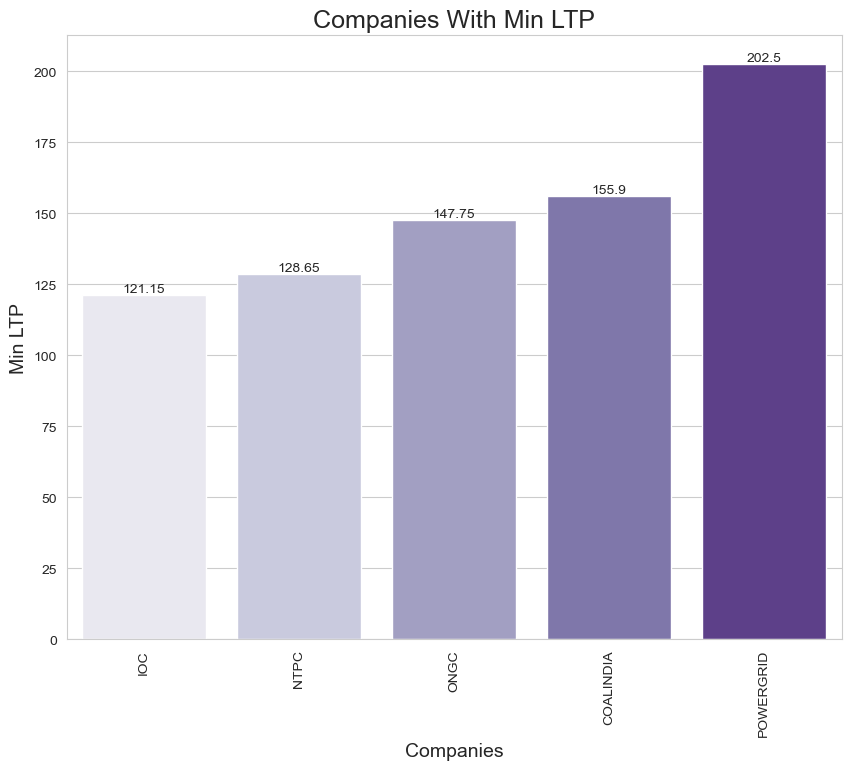

In [184]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(min_LTP.Symbol,min_LTP.LTP,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Min LTP",fontsize=14)
plt.title("Companies With Min LTP",fontsize=18)
for i in ax.containers:
    ax.bar_label(i)

In [77]:
data.LTP.sort_values(ascending=True).tail()

31     7150.00
47     7398.45
4     16684.00
32    19250.00
39    25900.00
Name: LTP, dtype: float64

In [78]:
max_LTP=data.loc[[31,47,4,32,39]]

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


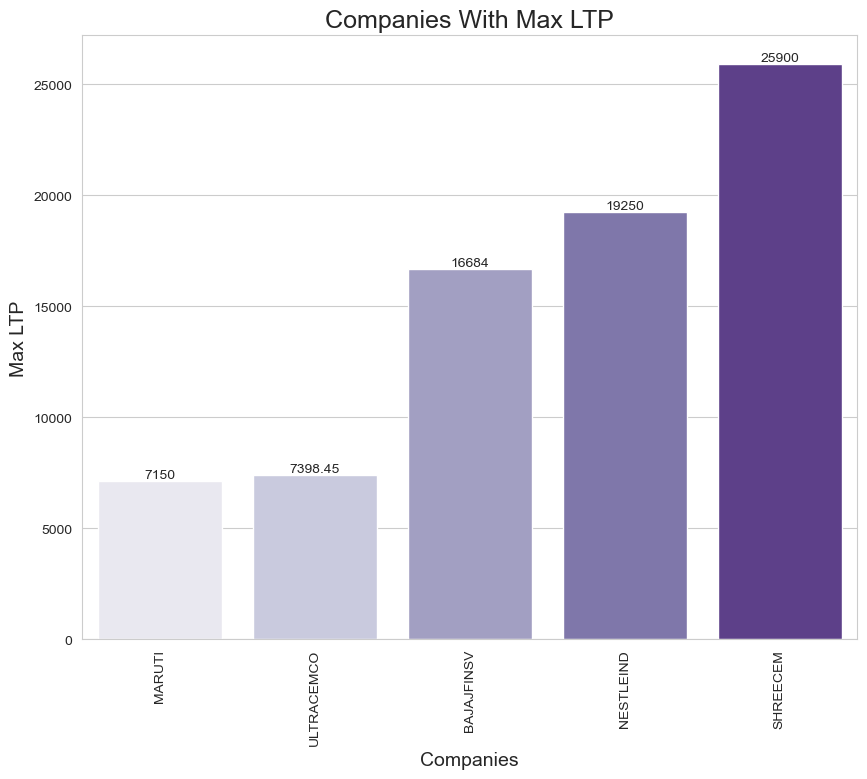

In [185]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_LTP.Symbol,max_LTP.LTP,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max LTP",fontsize=14)
plt.title("Companies With Max LTP",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies symbol with the Change


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


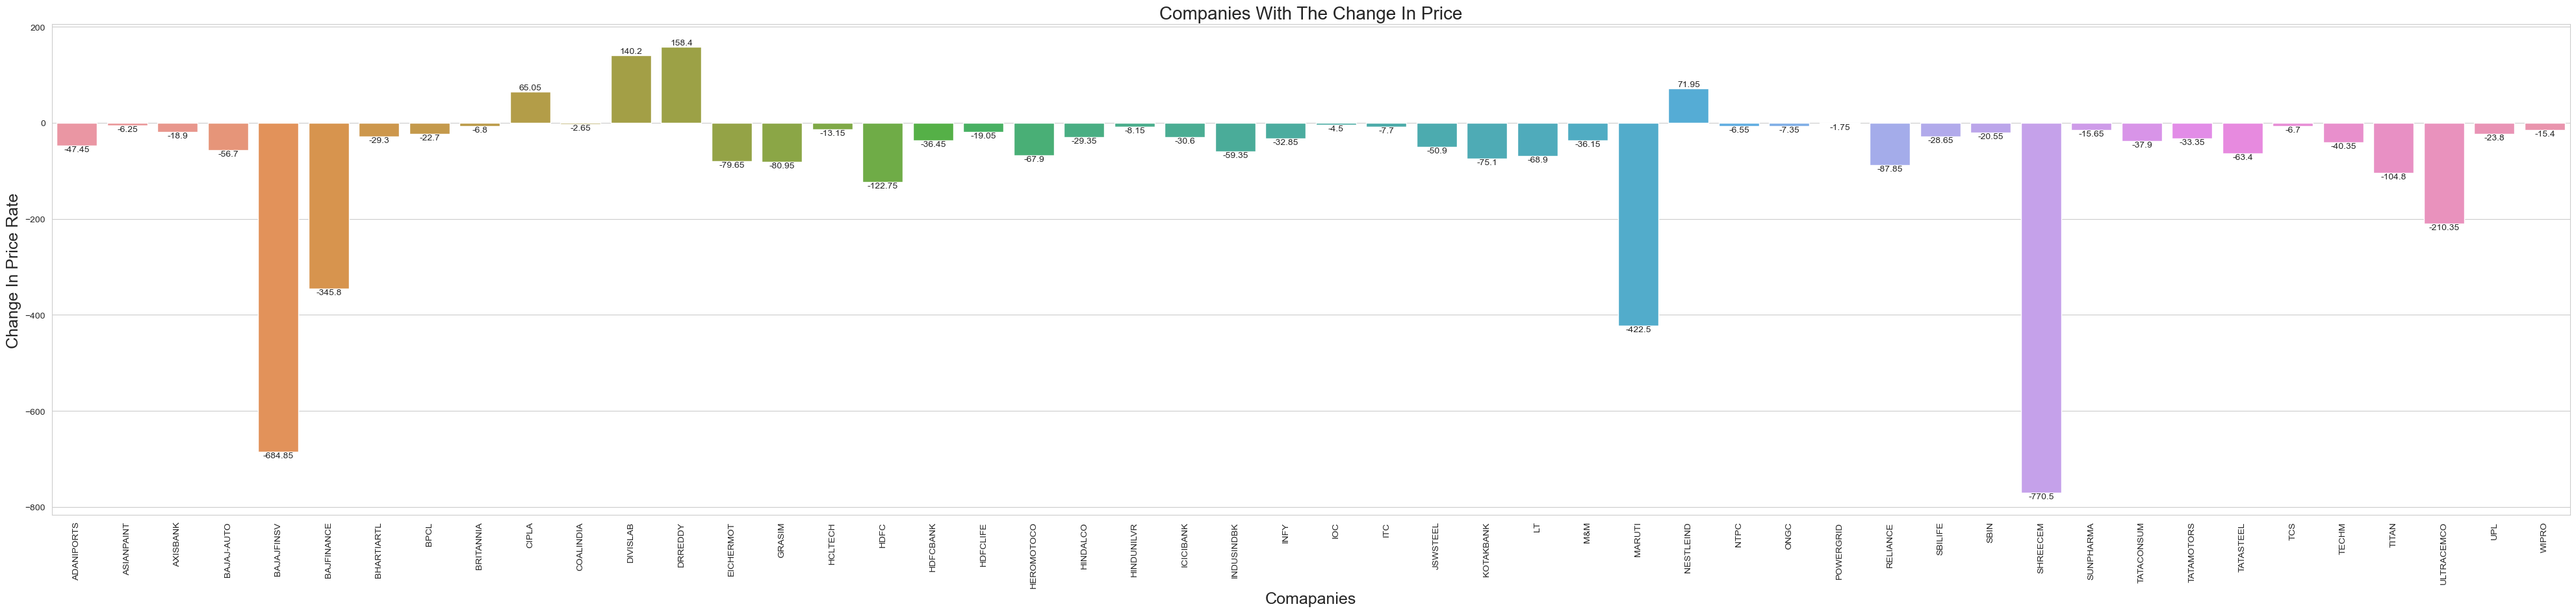

In [186]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(data.Symbol,data.Chng)
plt.xticks(rotation=90)
plt.xlabel("Comapanies",fontsize=18)
plt.ylabel("Change In Price Rate",fontsize=18)
plt.title("Companies With The Change In Price",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)


In [81]:
data.Chng.sort_values(ascending=True).head()

39   -770.50
4    -684.85
31   -422.50
5    -345.80
47   -210.35
Name: Chng, dtype: float64

In [84]:
max_negative_change=data.loc[[39,4,31,5,47]]
max_negative_change

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
39,SHREECEM,26450.0,26539.9,25812.0,25900.00,-770.50,-2.89,0.30,76.94,32048.0,22531.0,9.29,-6.76
4,BAJAJFINSV,17200.0,17237.2,16610.0,16684.00,-684.85,-3.94,3.42,576.79,19325.0,8273.7,91.38,-9.10
31,MARUTI,7520.0,7520.0,7130.0,7150.00,-422.50,-5.58,11.55,840.81,8368.0,6400.0,1.34,-2.02
5,BAJFINANCE,7021.0,7047.9,6775.0,6780.00,-345.80,-4.85,16.89,1161.63,8050.0,4362.0,44.57,-13.69
47,ULTRACEMCO,7550.0,7599.0,7370.1,7398.45,-210.35,-2.76,2.66,198.32,8269.0,4770.0,53.50,1.78


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


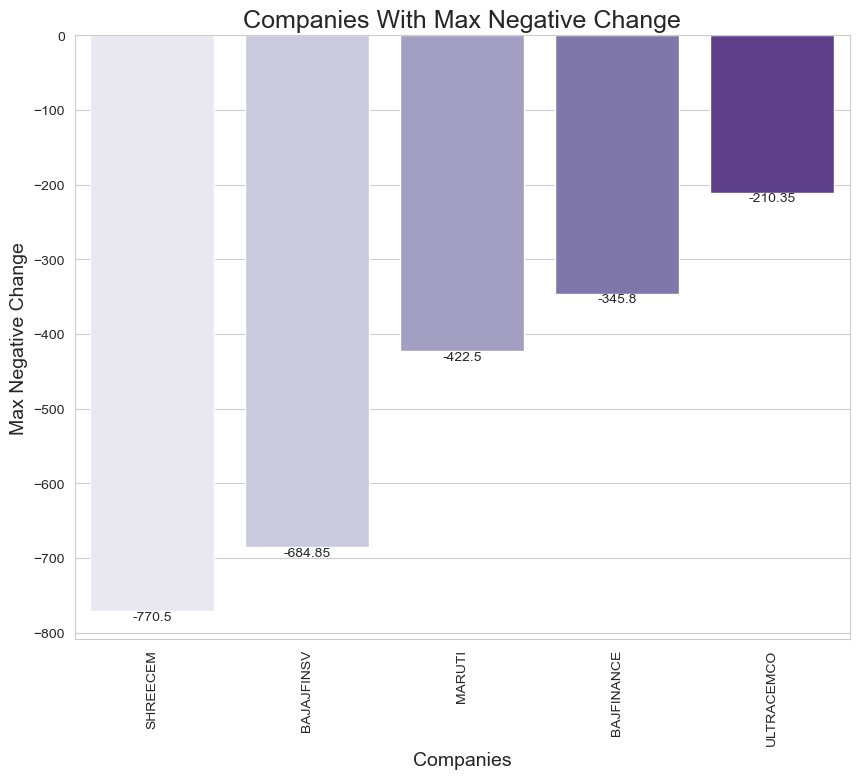

In [187]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_negative_change.Symbol,max_negative_change.Chng,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max Negative Change",fontsize=14)
plt.title("Companies With Max Negative Change",fontsize=18)
for i in ax.containers:
    ax.bar_label(i)

In [82]:
data.Chng.sort_values(ascending=True).tail()

35     -1.75
9      65.05
32     71.95
11    140.20
12    158.40
Name: Chng, dtype: float64

In [88]:
max_positive_change=data.loc[[35,9,32,11,12]]
max_positive_change

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
35,POWERGRID,204.05,204.95,200.80,202.5,-1.75,-0.86,96.11,195.09,209.95,136.88,3.69,6.36
9,CIPLA,892.00,976.05,890.65,965.0,65.05,7.23,144.59,1380.90,1005.00,726.50,31.89,6.34
32,NESTLEIND,19148.85,19434.10,18982.50,19250.0,71.95,0.38,0.56,108.61,20609.15,16002.10,9.87,0.17
11,DIVISLAB,4770.00,5077.70,4756.75,4940.0,140.20,2.92,15.71,775.37,5425.10,3153.30,42.39,-1.57
12,DRREDDY,4580.00,4820.00,4576.15,4750.0,158.40,3.45,10.72,508.97,5614.60,4135.00,-1.17,1.80


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


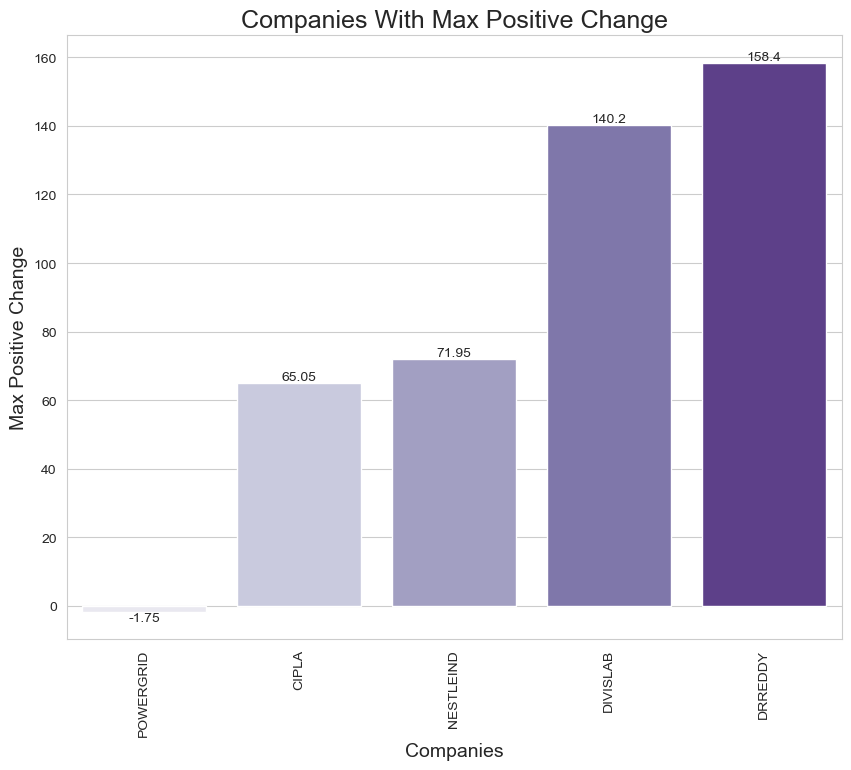

In [188]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_positive_change.Symbol,max_positive_change.Chng,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max Positive Change",fontsize=14)
plt.title("Companies With Max Positive Change",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies symbol with the Change in percent


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


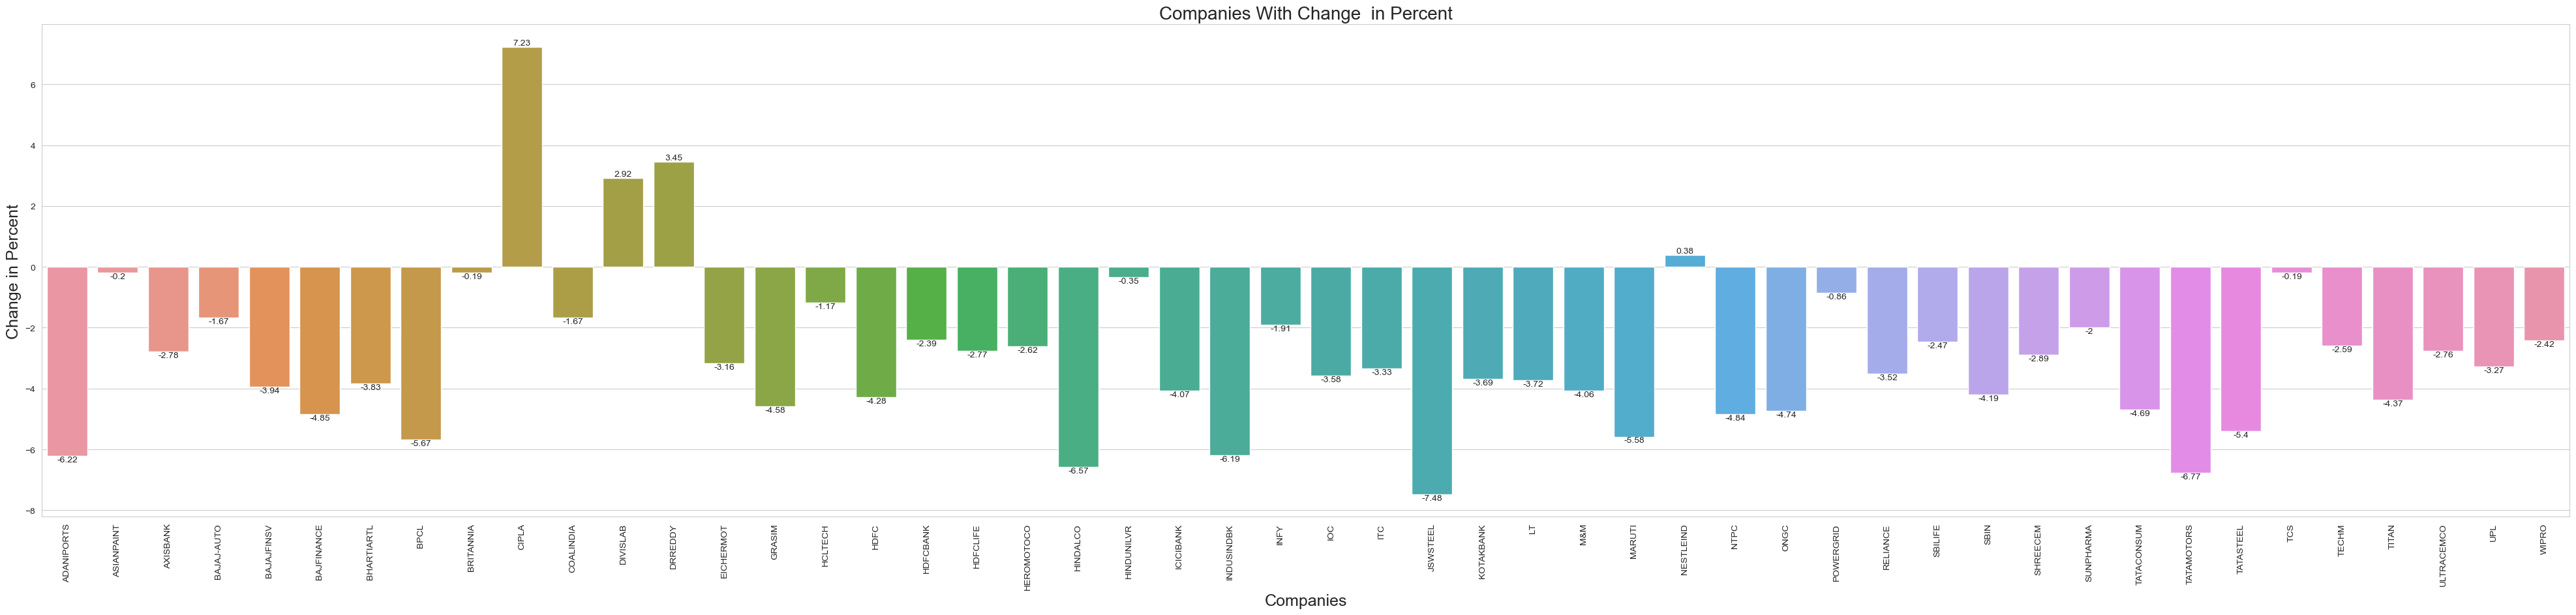

In [189]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(data.Symbol,data.percent_change)
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("Change in Percent",fontsize=18)
plt.title("Companies With Change  in Percent",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)


In [96]:
data.percent_change.sort_values(ascending=True).head()

27   -7.48
42   -6.77
20   -6.57
0    -6.22
23   -6.19
Name: percent_change, dtype: float64

In [97]:
max_negative_percent_change=data.loc[[27,42,20,0,23]]
max_negative_percent_change

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
27,JSWSTEEL,668.25,672.55,624.25,630.00,-50.90,-7.48,89.22,574.61,776.50,336.00,86.25,-9.27
42,TATAMOTORS,486.00,486.75,458.00,459.40,-33.35,-6.77,517.88,2430.36,536.70,156.70,167.95,-9.68
20,HINDALCO,441.80,442.70,414.70,417.70,-29.35,-6.57,148.26,631.93,551.85,220.35,86.93,-14.06
0,ADANIPORTS,750.00,766.00,713.25,715.00,-47.45,-6.22,72.20,532.63,901.00,384.40,79.22,-4.65
23,INDUSINDBK,951.00,956.95,898.00,899.95,-59.35,-6.19,67.46,622.74,1242.00,789.00,5.25,-22.08


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


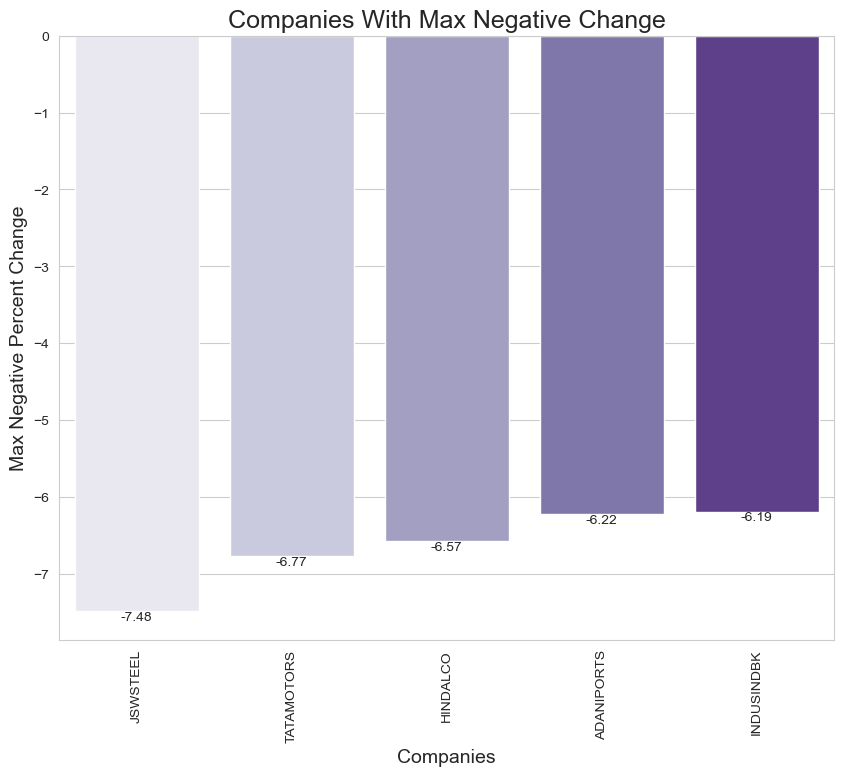

In [190]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_negative_percent_change.Symbol,max_negative_percent_change.percent_change,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max Negative Percent Change",fontsize=14)
plt.title("Companies With Max Negative Change",fontsize=18)
for i in ax.containers:
    ax.bar_label(i)

In [99]:
data.percent_change.sort_values(ascending=True).tail()

8    -0.19
32    0.38
11    2.92
12    3.45
9     7.23
Name: percent_change, dtype: float64

In [101]:
max_positive_percent_change=data.loc[[8,32,11,12,9]]
max_positive_percent_change

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
8,BRITANNIA,3560.00,3635.10,3533.95,3566.6,-6.80,-0.19,3.73,133.23,4153.00,3317.3,0.30,-3.42
32,NESTLEIND,19148.85,19434.10,18982.50,19250.0,71.95,0.38,0.56,108.61,20609.15,16002.1,9.87,0.17
11,DIVISLAB,4770.00,5077.70,4756.75,4940.0,140.20,2.92,15.71,775.37,5425.10,3153.3,42.39,-1.57
12,DRREDDY,4580.00,4820.00,4576.15,4750.0,158.40,3.45,10.72,508.97,5614.60,4135.0,-1.17,1.80
9,CIPLA,892.00,976.05,890.65,965.0,65.05,7.23,144.59,1380.90,1005.00,726.5,31.89,6.34


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


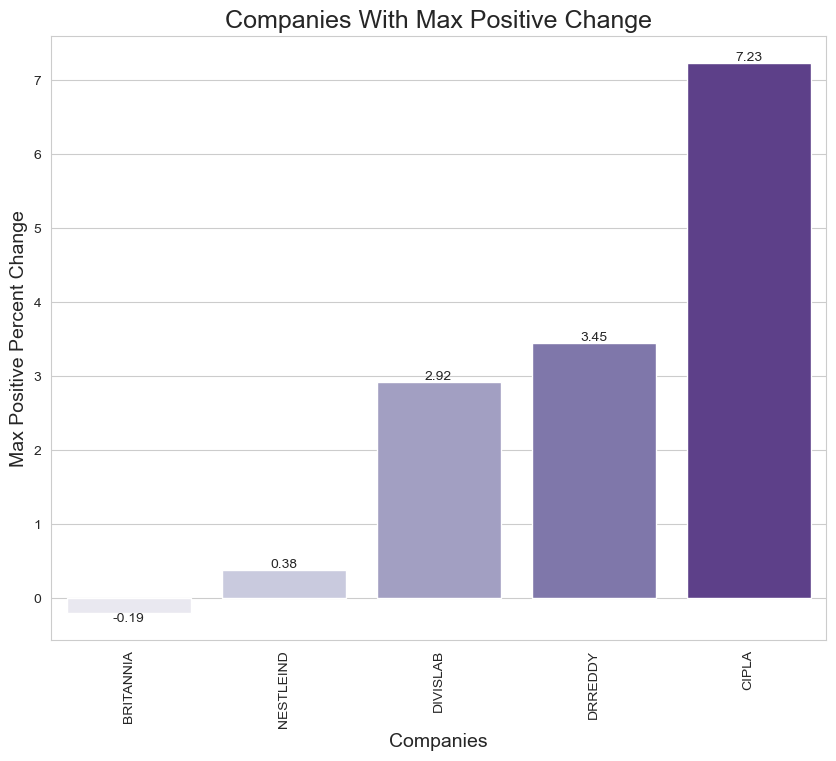

In [191]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_positive_percent_change.Symbol,max_positive_percent_change.percent_change,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max Positive Percent Change",fontsize=14)
plt.title("Companies With Max Positive Change",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies  with  Volume in lakhs


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


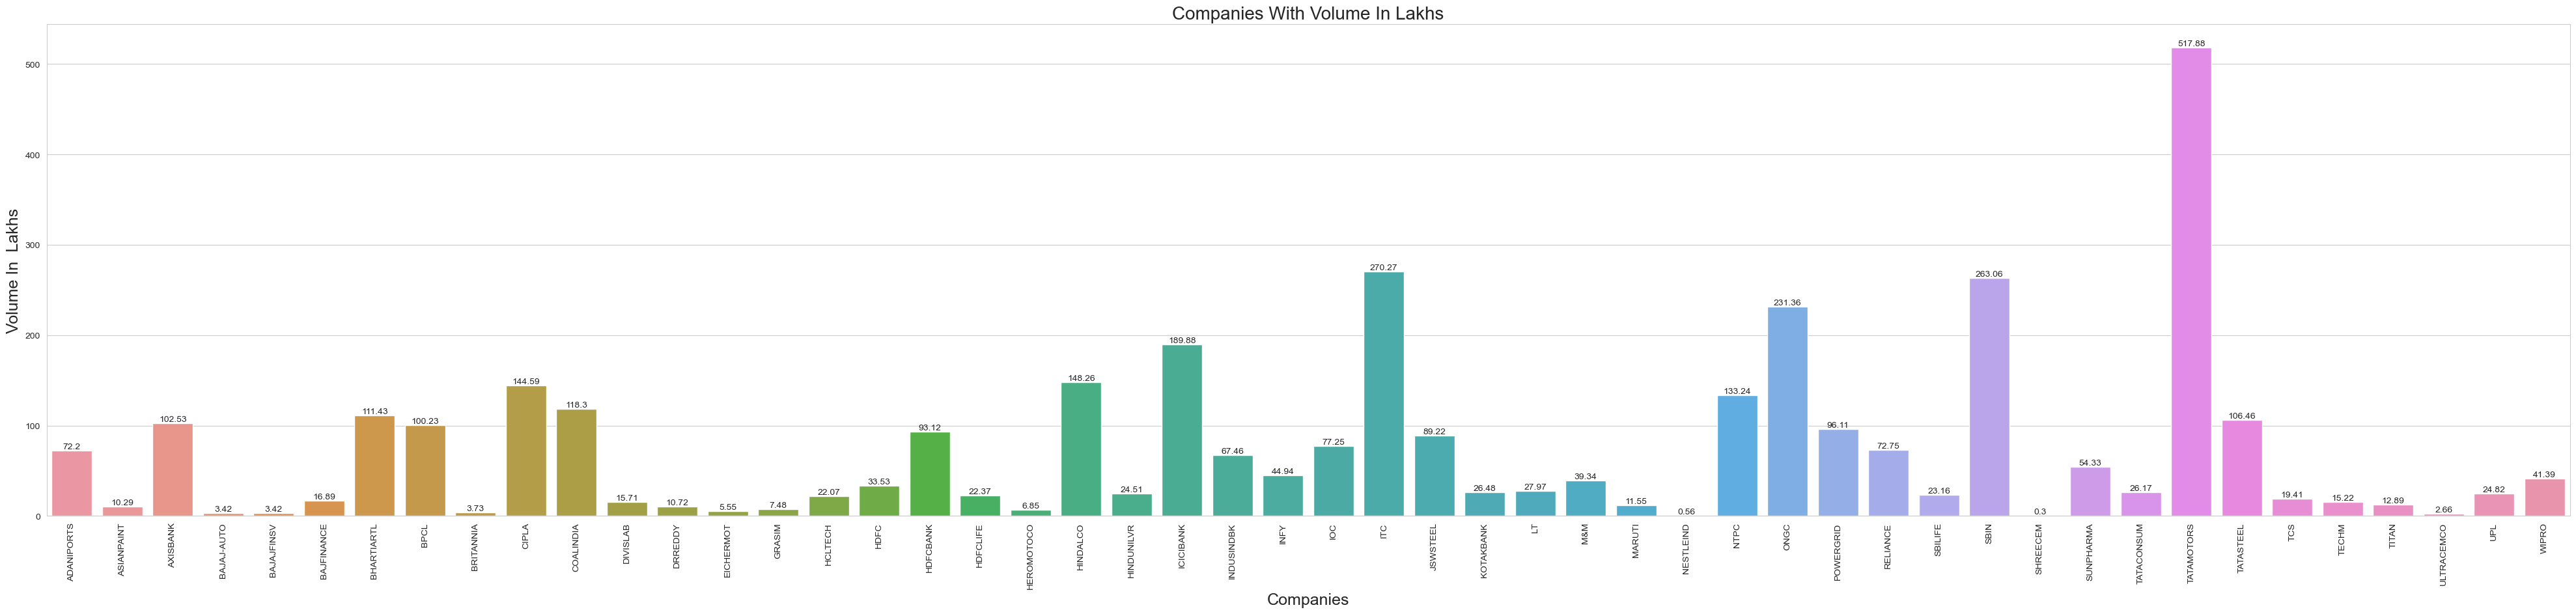

In [193]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(data.Symbol,data.volume_in_lakhs)
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("Volume In  Lakhs",fontsize=18)
plt.title("Companies With Volume In Lakhs",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)


In [105]:
data.volume_in_lakhs.sort_values(ascending=True).head()

39    0.30
32    0.56
47    2.66
3     3.42
4     3.42
Name: volume_in_lakhs, dtype: float64

In [107]:
min_volume=data.loc[[39,32,47,3,4]]
min_volume

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
39,SHREECEM,26450.00,26539.9,25812.0,25900.00,-770.50,-2.89,0.30,76.94,32048.00,22531.0,9.29,-6.76
32,NESTLEIND,19148.85,19434.1,18982.5,19250.00,71.95,0.38,0.56,108.61,20609.15,16002.1,9.87,0.17
47,ULTRACEMCO,7550.00,7599.0,7370.1,7398.45,-210.35,-2.76,2.66,198.32,8269.00,4770.0,53.50,1.78
3,BAJAJ-AUTO,3370.00,3383.5,3320.0,3335.00,-56.70,-1.67,3.42,114.59,4361.40,3041.0,9.30,-12.05
4,BAJAJFINSV,17200.00,17237.2,16610.0,16684.00,-684.85,-3.94,3.42,576.79,19325.00,8273.7,91.38,-9.10


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


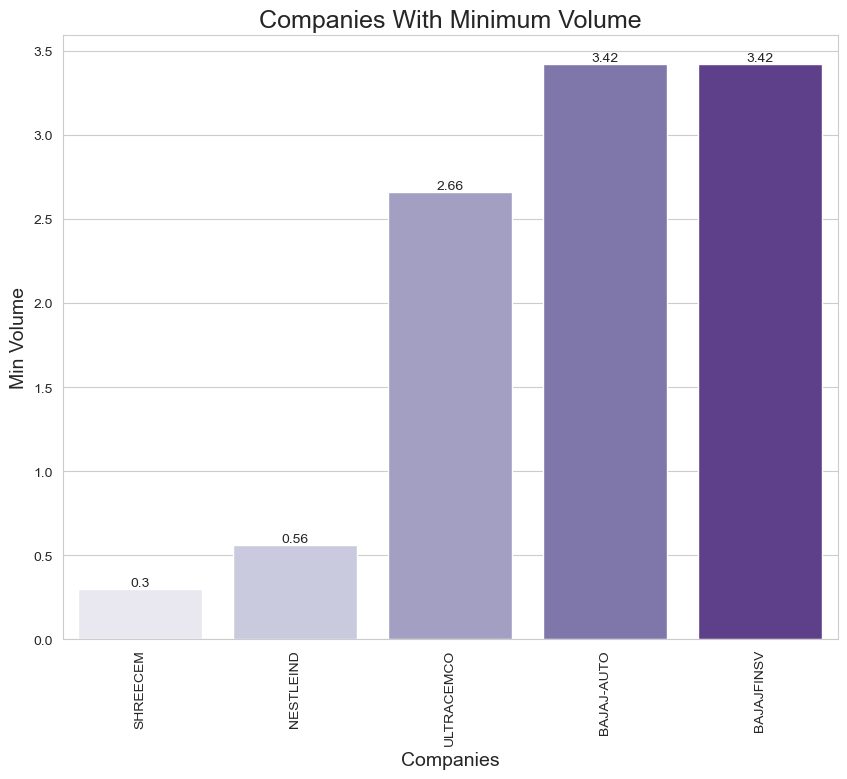

In [194]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(min_volume.Symbol,min_volume.volume_in_lakhs,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Min Volume",fontsize=14)
plt.title("Companies With Minimum Volume",fontsize=18)
for i in ax.containers:
    ax.bar_label(i)

In [109]:
data.volume_in_lakhs.sort_values(ascending=True).tail()

22    189.88
34    231.36
38    263.06
26    270.27
42    517.88
Name: volume_in_lakhs, dtype: float64

In [110]:
max_volume=data.loc[[22,34,38,26,42]]
max_volume

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
22,ICICIBANK,739.00,742.05,718.60,720.45,-30.60,-4.07,189.88,1385.86,867.00,465.80,52.41,-13.14
34,ONGC,152.25,152.25,146.25,147.75,-7.35,-4.74,231.36,344.33,172.75,77.05,82.86,-9.41
38,SBIN,486.25,487.90,467.10,470.00,-20.55,-4.19,263.06,1249.55,542.30,240.15,93.42,-8.30
26,ITC,228.90,230.05,223.10,223.60,-7.70,-3.33,270.27,610.54,265.30,192.40,15.35,-5.53
42,TATAMOTORS,486.00,486.75,458.00,459.40,-33.35,-6.77,517.88,2430.36,536.70,156.70,167.95,-9.68


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


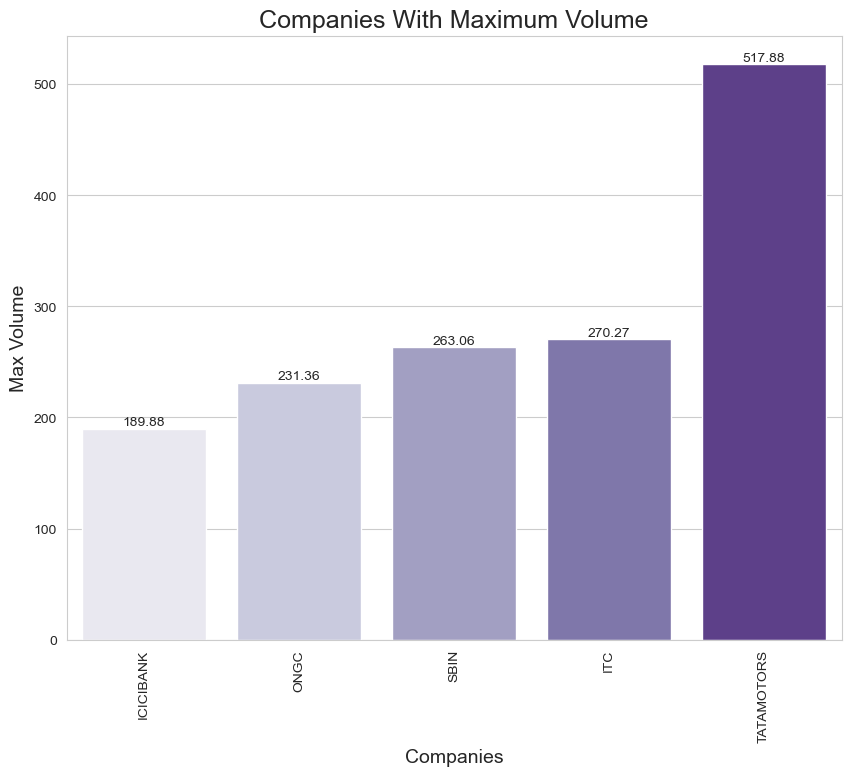

In [195]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_volume.Symbol,max_volume.volume_in_lakhs,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max Volume",fontsize=14)
plt.title("Companies With Maximum Volume",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies  with  Turnover in crores


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


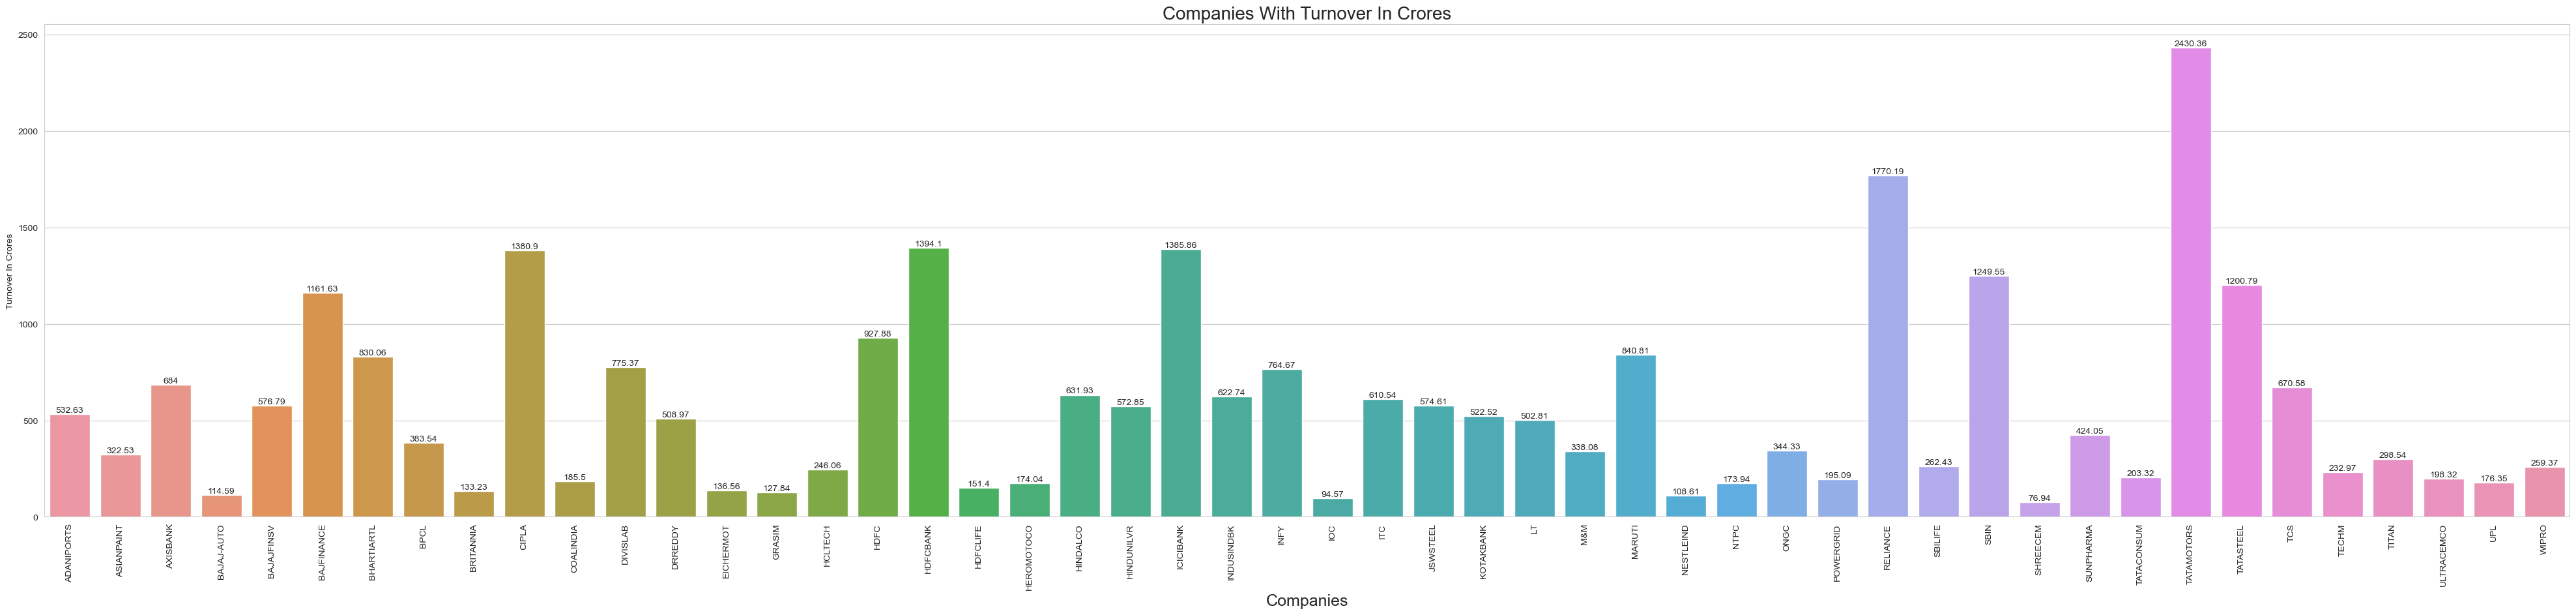

In [197]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(data.Symbol,data.Turnover_in_crores)
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("Turnover In Crores")
plt.title("Companies With Turnover In Crores",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)


In [115]:
data.Turnover_in_crores.sort_values(ascending=True).head()

39     76.94
25     94.57
32    108.61
3     114.59
14    127.84
Name: Turnover_in_crores, dtype: float64

In [117]:
min_turnover=data.loc[[39,25,32,3,14]]
min_turnover

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
39,SHREECEM,26450.00,26539.90,25812.0,25900.00,-770.50,-2.89,0.30,76.94,32048.00,22531.00,9.29,-6.76
25,IOC,125.60,125.60,120.5,121.15,-4.50,-3.58,77.25,94.57,141.50,84.00,41.28,-7.87
32,NESTLEIND,19148.85,19434.10,18982.5,19250.00,71.95,0.38,0.56,108.61,20609.15,16002.10,9.87,0.17
3,BAJAJ-AUTO,3370.00,3383.50,3320.0,3335.00,-56.70,-1.67,3.42,114.59,4361.40,3041.00,9.30,-12.05
14,GRASIM,1757.30,1757.85,1679.0,1685.80,-80.95,-4.58,7.48,127.84,1893.00,840.05,99.95,-3.08


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


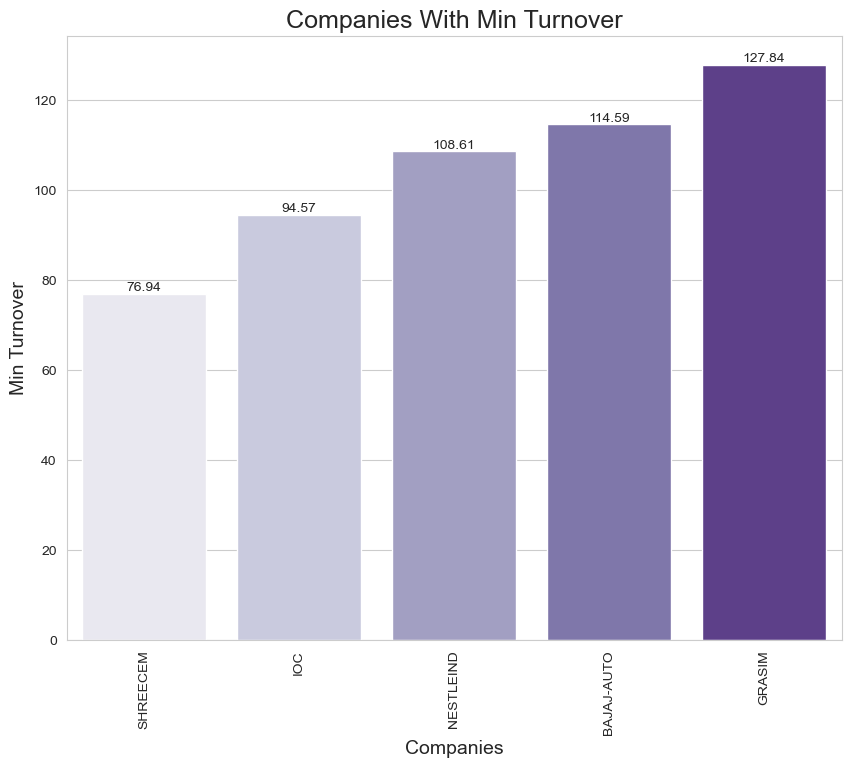

In [198]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(min_turnover.Symbol,min_turnover.Turnover_in_crores,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Min Turnover",fontsize=14)
plt.title("Companies With Min Turnover",fontsize=18)
for i in ax.containers:
    ax.bar_label(i)

In [119]:
data.Turnover_in_crores.sort_values(ascending=True).tail()

9     1380.90
22    1385.86
17    1394.10
36    1770.19
42    2430.36
Name: Turnover_in_crores, dtype: float64

In [121]:
max_turnover=data.loc[[9,22,17,36,42]]
max_turnover

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
9,CIPLA,892.0,976.05,890.65,965.00,65.05,7.23,144.59,1380.90,1005.00,726.5,31.89,6.34
22,ICICIBANK,739.0,742.05,718.60,720.45,-30.60,-4.07,189.88,1385.86,867.00,465.8,52.41,-13.14
17,HDFCBANK,1500.0,1506.70,1485.00,1489.50,-36.45,-2.39,93.12,1394.10,1725.00,1342.0,6.18,-9.88
36,RELIANCE,2467.8,2477.60,2401.50,2405.10,-87.85,-3.52,72.75,1770.19,2751.35,1830.0,23.48,-9.62
42,TATAMOTORS,486.0,486.75,458.00,459.40,-33.35,-6.77,517.88,2430.36,536.70,156.7,167.95,-9.68


/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


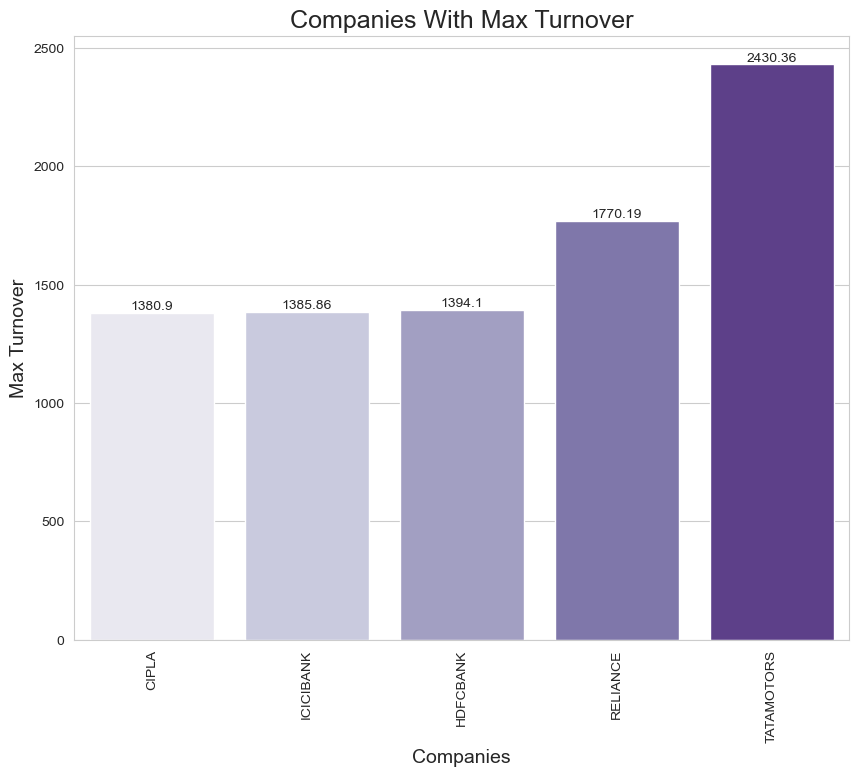

In [199]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(max_turnover.Symbol,max_turnover.Turnover_in_crores,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max Turnover",fontsize=14)
plt.title("Companies With Max Turnover",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies  with  52 weeks high


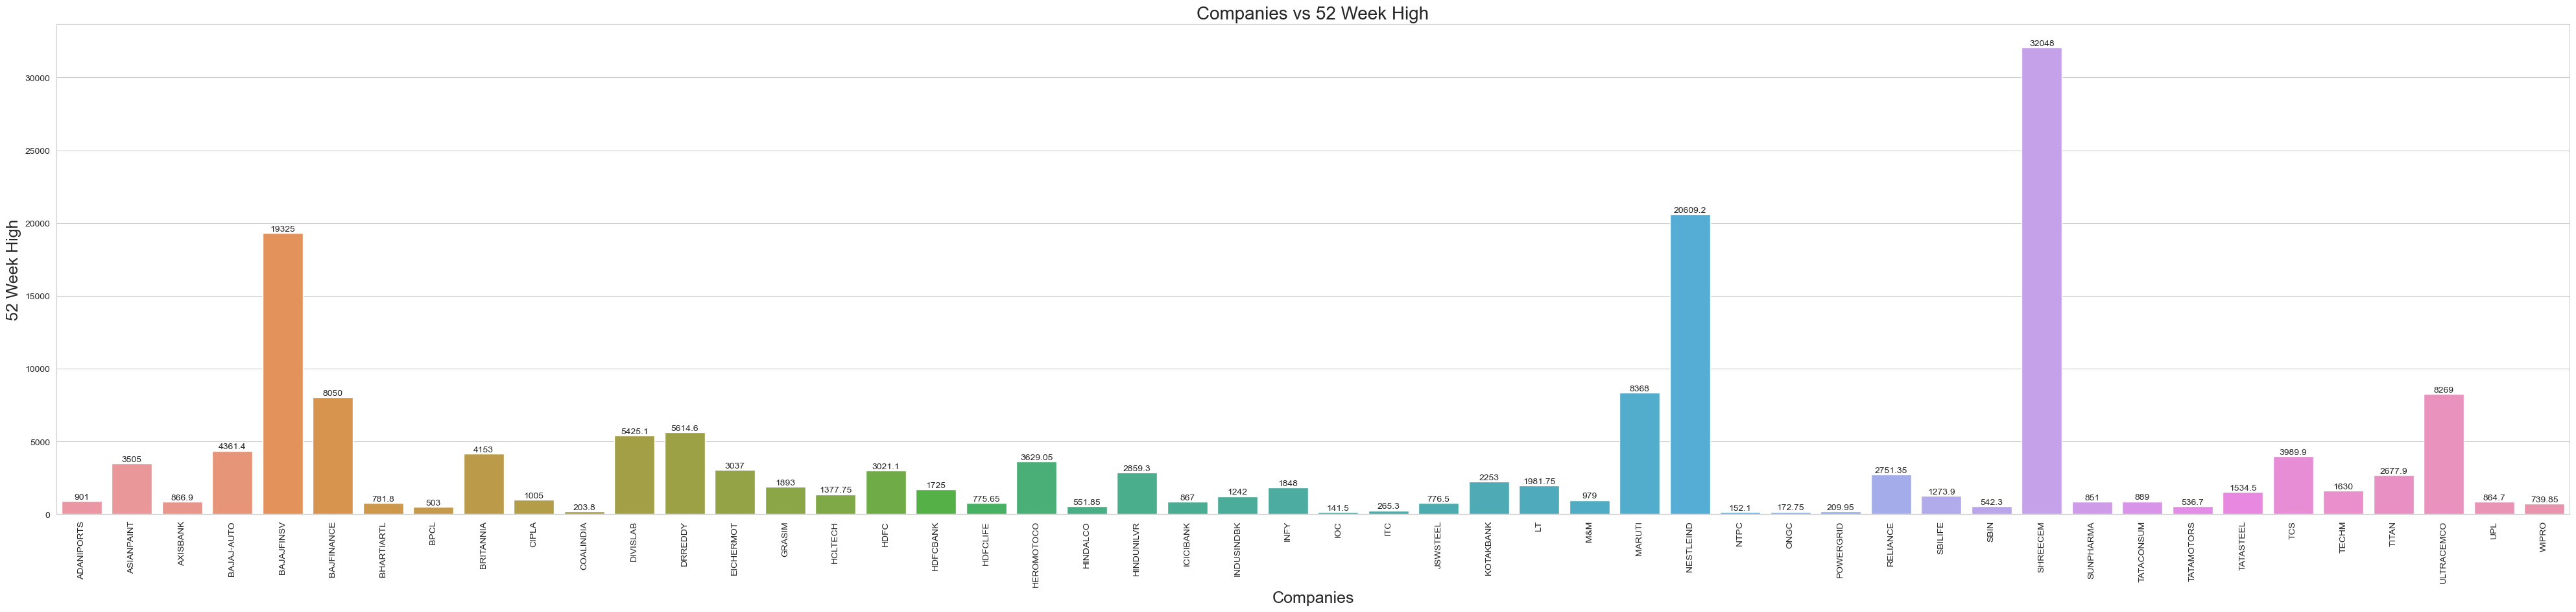

In [201]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(x='Symbol',y='52_weeks_high',data=data)
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("52 Week High",fontsize=18)
plt.title("Companies vs 52 Week High",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)


In [132]:
data['52_weeks_high'].sort_values(ascending=True).head()

25    141.50
33    152.10
34    172.75
10    203.80
35    209.95
Name: 52_weeks_high, dtype: float64

In [135]:
min_52week_high=data.loc[[25,33,34,10,35]]
min_52week_high

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
25,IOC,125.60,125.60,120.50,121.15,-4.50,-3.58,77.25,94.57,141.50,84.00,41.28,-7.87
33,NTPC,133.20,134.05,128.00,128.65,-6.55,-4.84,133.24,173.94,152.10,88.15,36.93,-10.16
34,ONGC,152.25,152.25,146.25,147.75,-7.35,-4.74,231.36,344.33,172.75,77.05,82.86,-9.41
10,COALINDIA,157.75,159.40,155.35,155.90,-2.65,-1.67,118.30,185.50,203.80,123.25,25.78,-10.94
35,POWERGRID,204.05,204.95,200.80,202.50,-1.75,-0.86,96.11,195.09,209.95,136.88,3.69,6.36


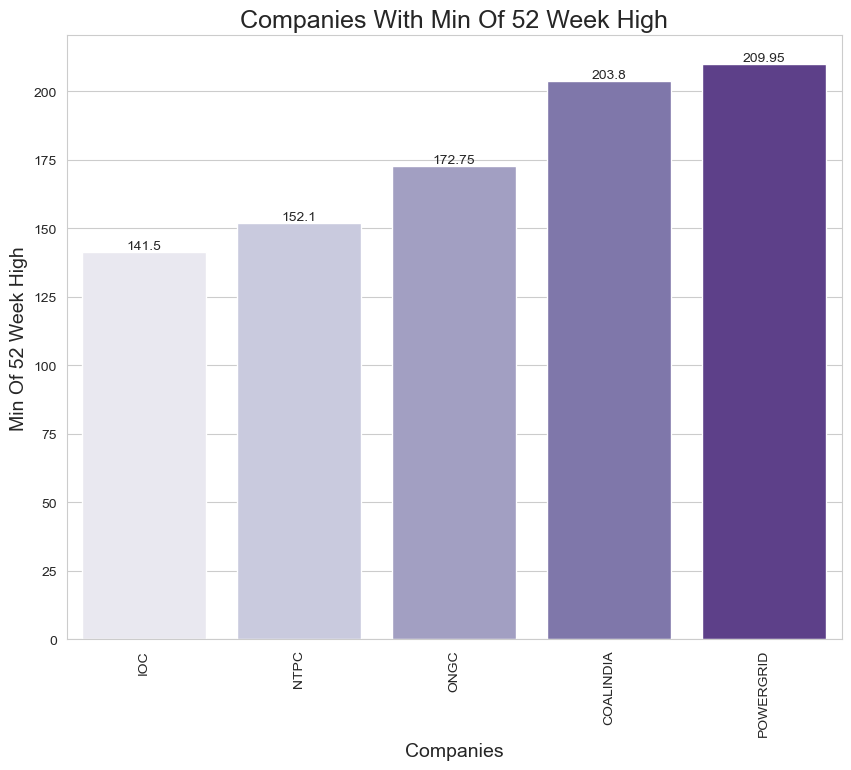

In [202]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(x='Symbol',y='52_weeks_high',data=min_52week_high,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Min Of 52 Week High",fontsize=14)
plt.title("Companies With Min Of 52 Week High",fontsize=18)
for i in ax.containers:
    ax.bar_label(i)

In [137]:
data['52_weeks_high'].sort_values(ascending=True).tail()

47     8269.00
31     8368.00
4     19325.00
32    20609.15
39    32048.00
Name: 52_weeks_high, dtype: float64

In [138]:
max_52week_high=data.loc[[47,31,4,32,39]]
max_52week_high

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
47,ULTRACEMCO,7550.00,7599.0,7370.1,7398.45,-210.35,-2.76,2.66,198.32,8269.00,4770.0,53.50,1.78
31,MARUTI,7520.00,7520.0,7130.0,7150.00,-422.50,-5.58,11.55,840.81,8368.00,6400.0,1.34,-2.02
4,BAJAJFINSV,17200.00,17237.2,16610.0,16684.00,-684.85,-3.94,3.42,576.79,19325.00,8273.7,91.38,-9.10
32,NESTLEIND,19148.85,19434.1,18982.5,19250.00,71.95,0.38,0.56,108.61,20609.15,16002.1,9.87,0.17
39,SHREECEM,26450.00,26539.9,25812.0,25900.00,-770.50,-2.89,0.30,76.94,32048.00,22531.0,9.29,-6.76


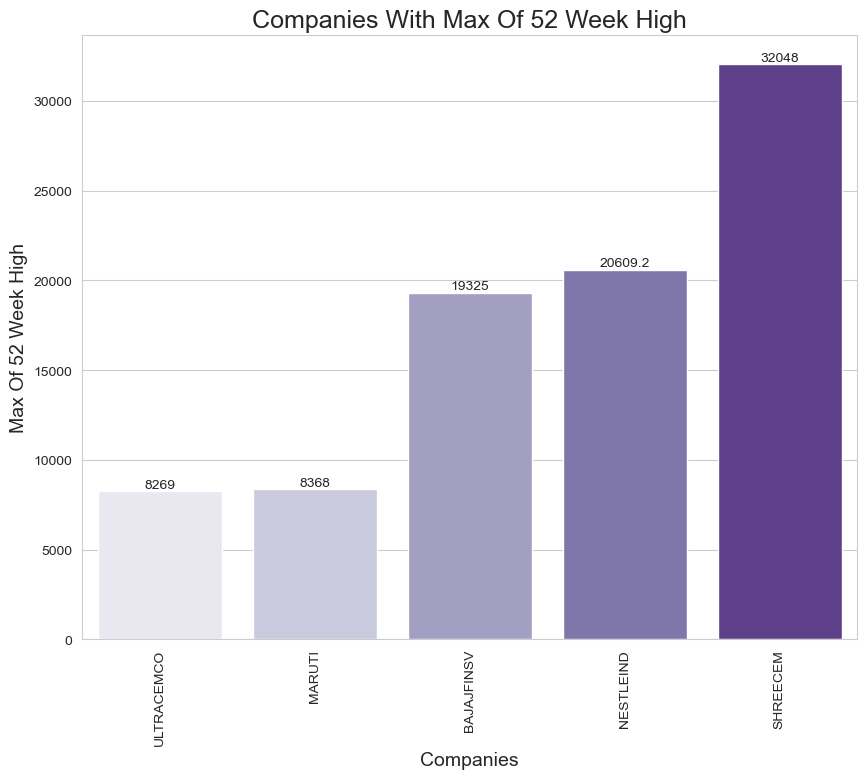

In [203]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(x='Symbol',y='52_weeks_high',data=max_52week_high,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max Of 52 Week High",fontsize=14)
plt.title("Companies With Max Of 52 Week High",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies  with  52 weeks low


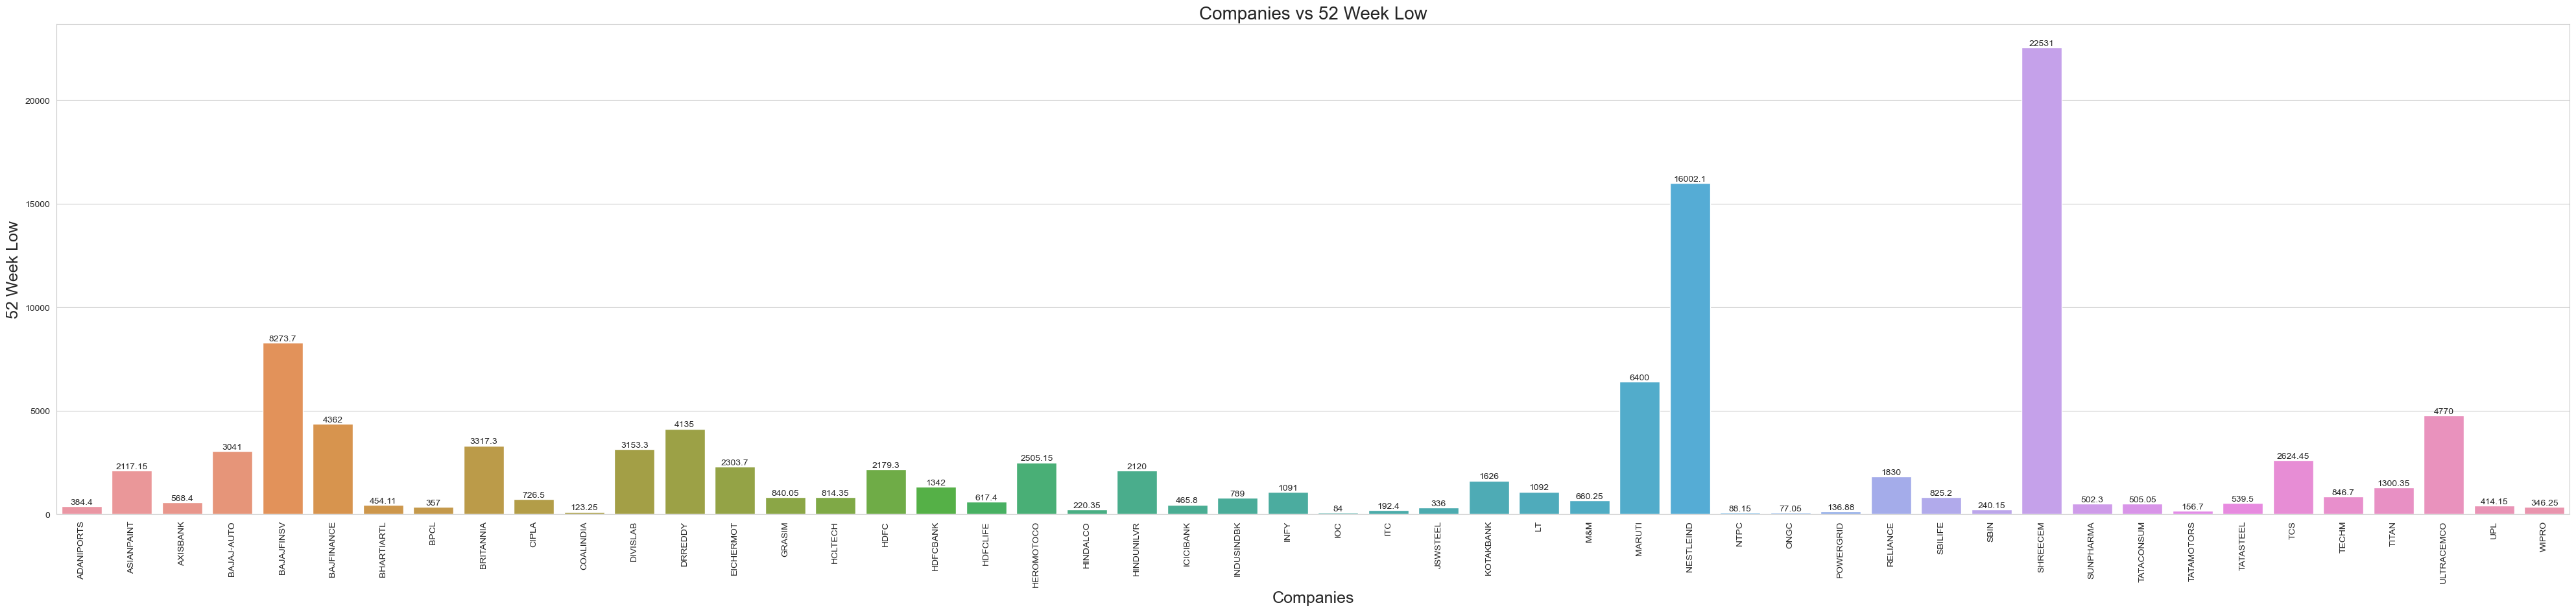

In [204]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(x='Symbol',y='52_weeks_low',data=data)
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("52 Week Low",fontsize=18)
plt.title("Companies vs 52 Week Low",fontsize=20)

for i in ax.containers:
    ax.bar_label(i)


In [141]:
data['52_weeks_low'].sort_values(ascending=True).head()

34     77.05
25     84.00
33     88.15
10    123.25
35    136.88
Name: 52_weeks_low, dtype: float64

In [142]:
min_52week_low=data.loc[[34,25,33,10,35]]
min_52week_low

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
34,ONGC,152.25,152.25,146.25,147.75,-7.35,-4.74,231.36,344.33,172.75,77.05,82.86,-9.41
25,IOC,125.60,125.60,120.50,121.15,-4.50,-3.58,77.25,94.57,141.50,84.00,41.28,-7.87
33,NTPC,133.20,134.05,128.00,128.65,-6.55,-4.84,133.24,173.94,152.10,88.15,36.93,-10.16
10,COALINDIA,157.75,159.40,155.35,155.90,-2.65,-1.67,118.30,185.50,203.80,123.25,25.78,-10.94
35,POWERGRID,204.05,204.95,200.80,202.50,-1.75,-0.86,96.11,195.09,209.95,136.88,3.69,6.36


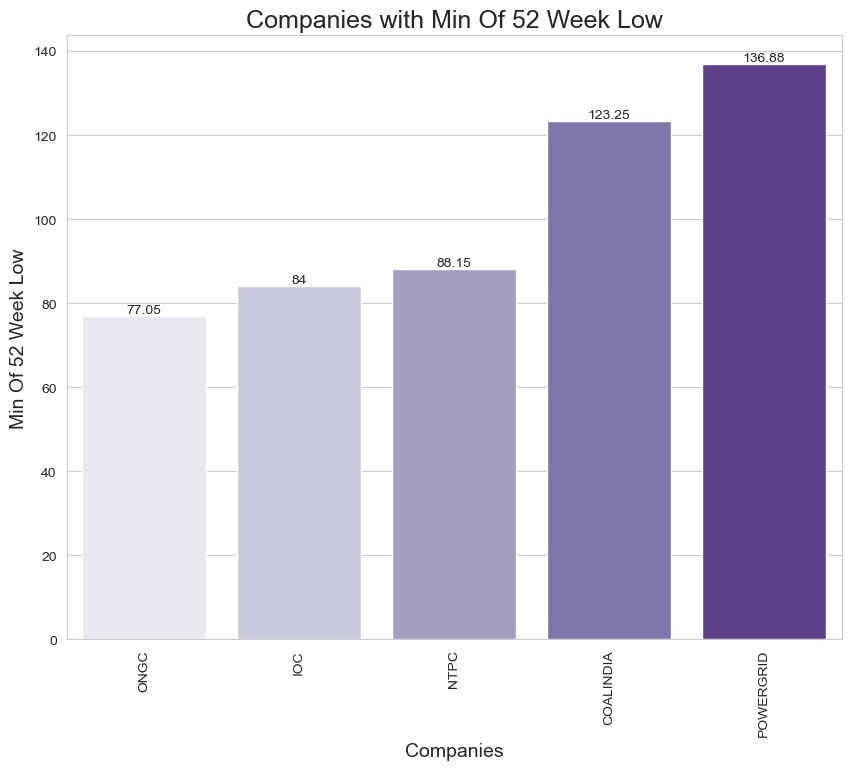

In [205]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(x='Symbol',y='52_weeks_low',data=min_52week_low,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Min Of 52 Week Low",fontsize=14)
plt.title("Companies with Min Of 52 Week Low",fontsize=18)
for i in ax.containers:
    ax.bar_label(i)

In [144]:
data['52_weeks_low'].sort_values(ascending=True).tail()

47     4770.0
31     6400.0
4      8273.7
32    16002.1
39    22531.0
Name: 52_weeks_low, dtype: float64

In [146]:
max_52week_low=data.loc[[47,31,4,32,39]]
max_52week_low

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
47,ULTRACEMCO,7550.00,7599.0,7370.1,7398.45,-210.35,-2.76,2.66,198.32,8269.00,4770.0,53.50,1.78
31,MARUTI,7520.00,7520.0,7130.0,7150.00,-422.50,-5.58,11.55,840.81,8368.00,6400.0,1.34,-2.02
4,BAJAJFINSV,17200.00,17237.2,16610.0,16684.00,-684.85,-3.94,3.42,576.79,19325.00,8273.7,91.38,-9.10
32,NESTLEIND,19148.85,19434.1,18982.5,19250.00,71.95,0.38,0.56,108.61,20609.15,16002.1,9.87,0.17
39,SHREECEM,26450.00,26539.9,25812.0,25900.00,-770.50,-2.89,0.30,76.94,32048.00,22531.0,9.29,-6.76


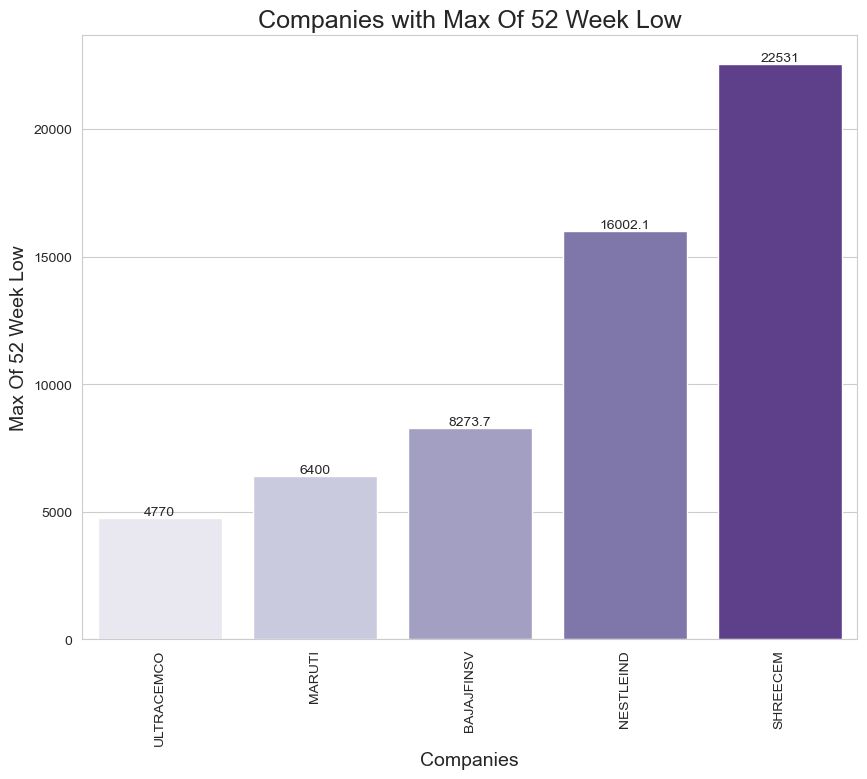

In [206]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(x='Symbol',y='52_weeks_low',data=max_52week_low,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max Of 52 Week Low",fontsize=14)
plt.title("Companies with Max Of 52 Week Low",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies  with  365 days percent change


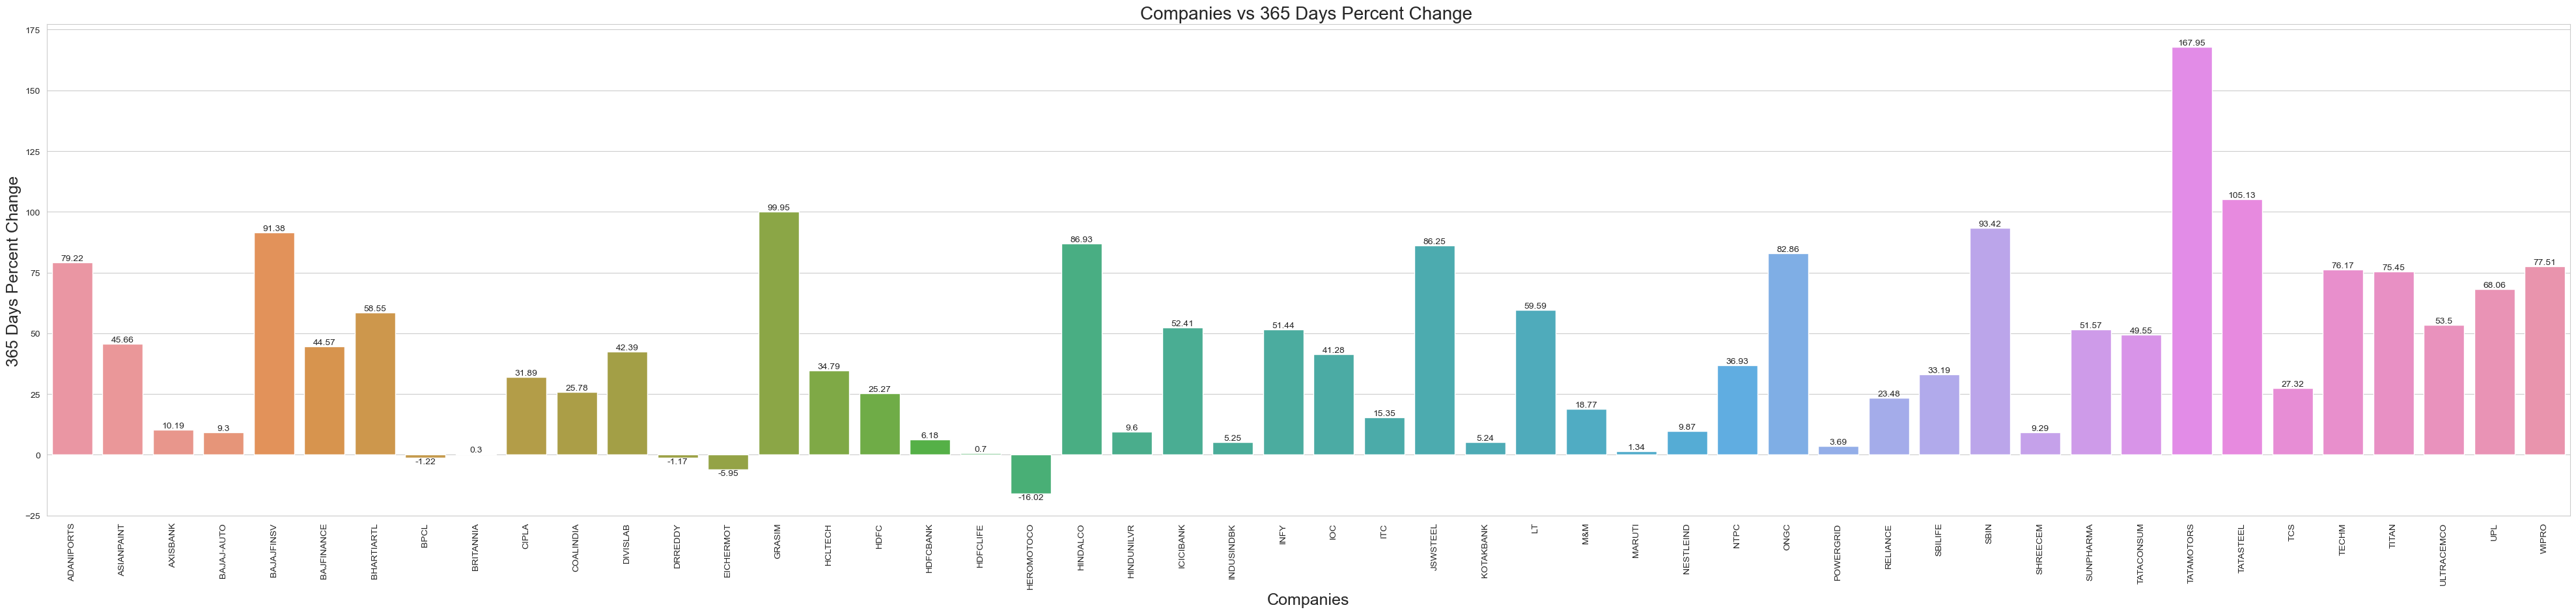

In [207]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(x='Symbol',y='365_day_percent_change',data=data)
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("365 Days Percent Change",fontsize=18)
plt.title("Companies vs 365 Days Percent Change ",fontsize=20)
for i in ax.containers:
    ax.bar_label(i)


In [149]:
data['365_day_percent_change'].sort_values(ascending=True).head()

19   -16.02
13    -5.95
7     -1.22
12    -1.17
8      0.30
Name: 365_day_percent_change, dtype: float64

In [151]:
min_365day_percent_change=data.loc[[19,13,7,12,8]]
min_365day_percent_change

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
19,HEROMOTOCO,2580.00,2589.7,2505.15,2526.80,-67.90,-2.62,6.85,174.04,3629.05,2505.15,-16.02,-6.43
13,EICHERMOT,2495.00,2506.1,2421.50,2440.75,-79.65,-3.16,5.55,136.56,3037.00,2303.70,-5.95,-5.77
7,BPCL,397.15,397.2,375.00,377.40,-22.70,-5.67,100.23,383.54,503.00,357.00,-1.22,-12.45
12,DRREDDY,4580.00,4820.0,4576.15,4750.00,158.40,3.45,10.72,508.97,5614.60,4135.00,-1.17,1.80
8,BRITANNIA,3560.00,3635.1,3533.95,3566.60,-6.80,-0.19,3.73,133.23,4153.00,3317.30,0.30,-3.42


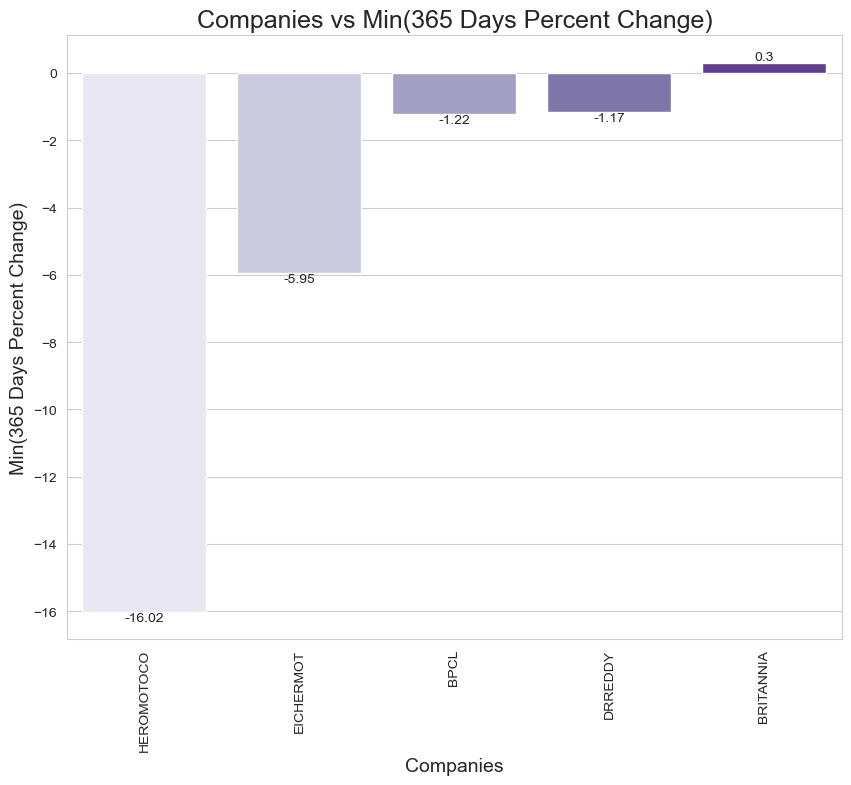

In [216]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(x='Symbol',y='365_day_percent_change',data=min_365day_percent_change,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Min(365 Days Percent Change)",fontsize=14)
plt.title("Companies vs Min(365 Days Percent Change)",fontsize=18)
for i in ax.containers:
    ax.bar_label(i)

In [153]:
data['365_day_percent_change'].sort_values(ascending=True).tail()

4      91.38
38     93.42
14     99.95
43    105.13
42    167.95
Name: 365_day_percent_change, dtype: float64

In [154]:
max_365days_percent_change=data.loc[[4,38,14,43,42]]
max_365days_percent_change

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
4,BAJAJFINSV,17200.00,17237.20,16610.00,16684.00,-684.85,-3.94,3.42,576.79,19325.0,8273.70,91.38,-9.10
38,SBIN,486.25,487.90,467.10,470.00,-20.55,-4.19,263.06,1249.55,542.3,240.15,93.42,-8.30
14,GRASIM,1757.30,1757.85,1679.00,1685.80,-80.95,-4.58,7.48,127.84,1893.0,840.05,99.95,-3.08
43,TATASTEEL,1157.90,1159.50,1106.25,1110.25,-63.40,-5.40,106.46,1200.79,1534.5,539.50,105.13,-17.37
42,TATAMOTORS,486.00,486.75,458.00,459.40,-33.35,-6.77,517.88,2430.36,536.7,156.70,167.95,-9.68


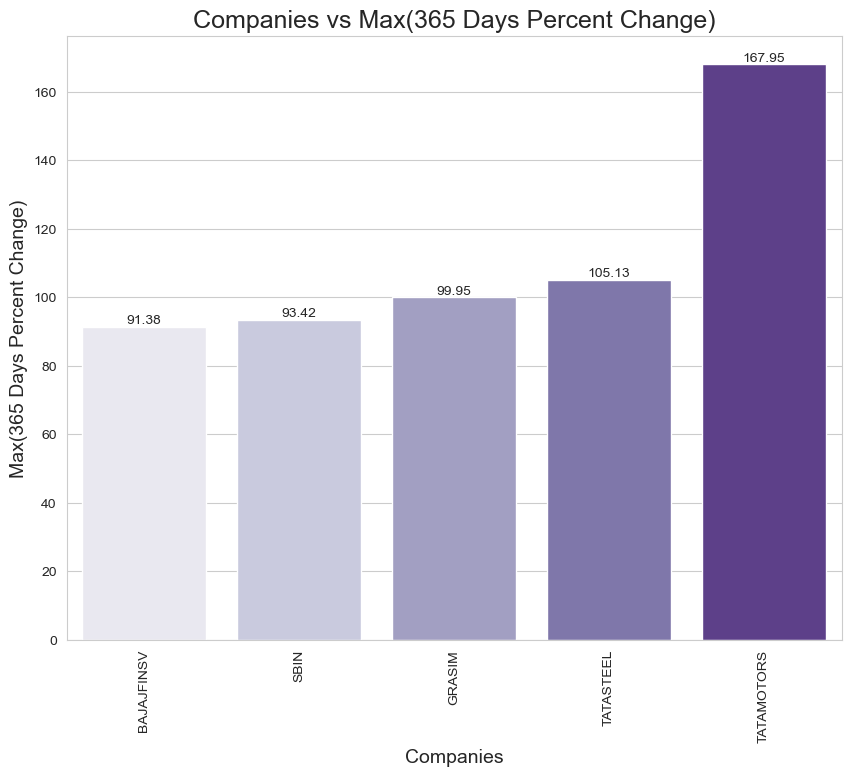

In [215]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(x='Symbol',y='365_day_percent_change',data=max_365days_percent_change,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max(365 Days Percent Change)",fontsize=14)
plt.title("Companies vs Max(365 Days Percent Change)",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

## 50 Companies  with  30 days percent change


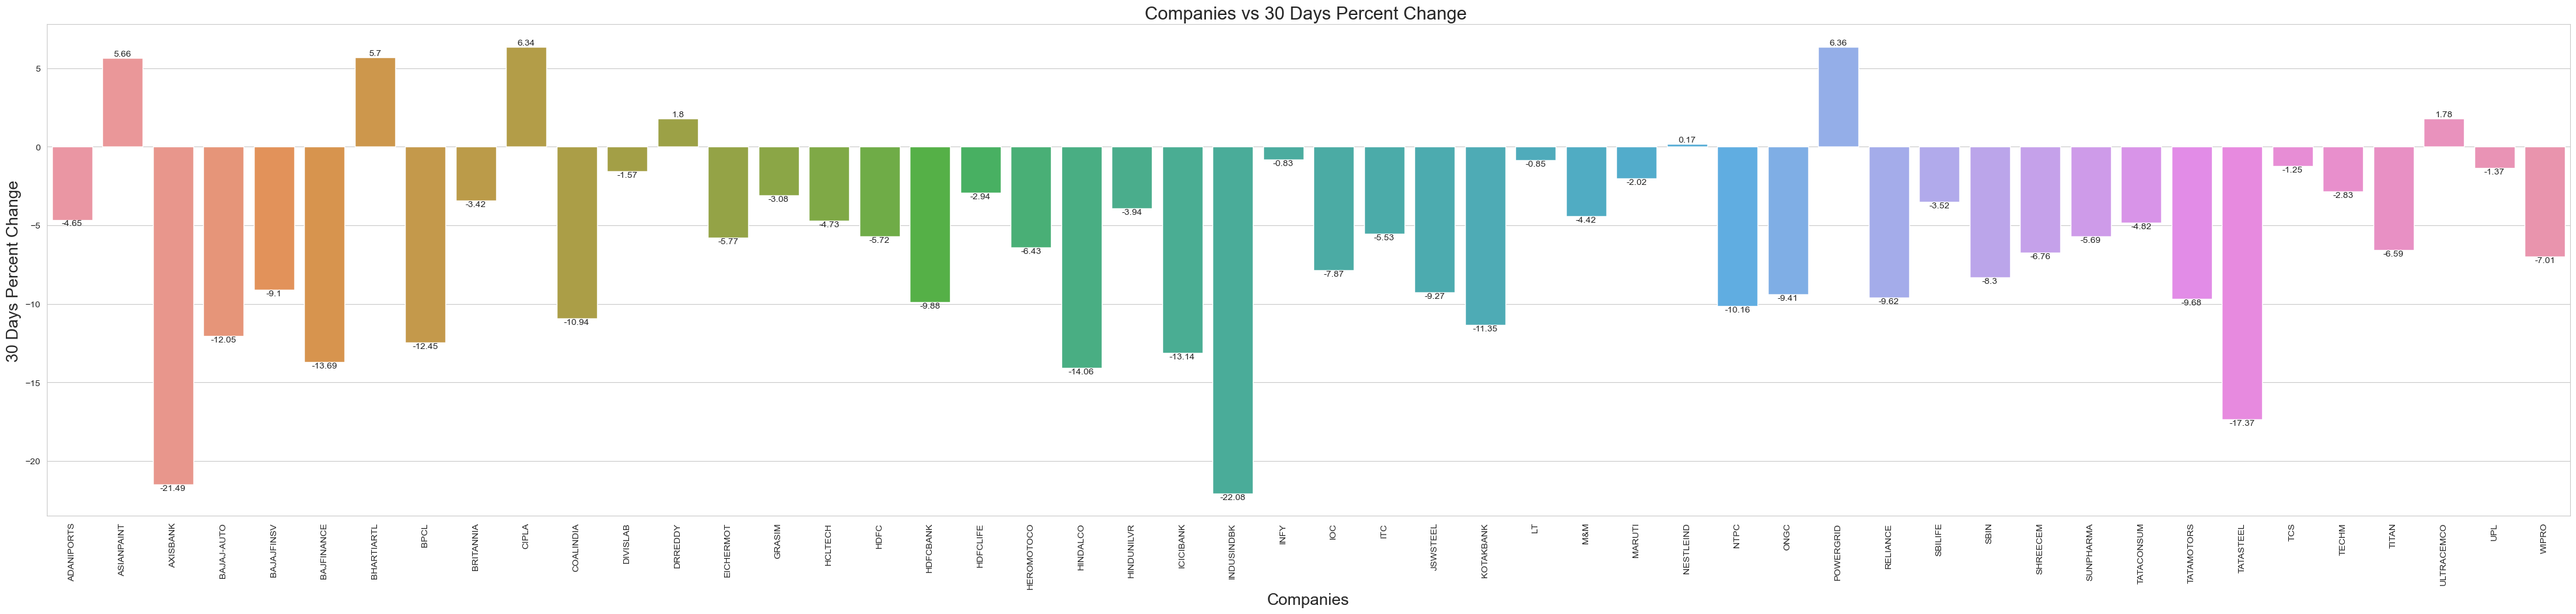

In [210]:
plt.figure(figsize=(50,10),dpi=100)
ax=sns.barplot(x='Symbol',y='30_day_percent_change',data=data)
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=18)
plt.ylabel("30 Days Percent Change",fontsize=18)
plt.title("Companies vs 30 Days Percent Change ",fontsize=20)

for i in ax.containers:
    ax.bar_label(i)


In [158]:
data['30_day_percent_change'].sort_values(ascending=True).head()

23   -22.08
2    -21.49
43   -17.37
20   -14.06
5    -13.69
Name: 30_day_percent_change, dtype: float64

In [159]:
min_30day_percent_change=data.loc[[23,2,43,20,5]]
min_30day_percent_change

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
23,INDUSINDBK,951.0,956.95,898.00,899.95,-59.35,-6.19,67.46,622.74,1242.00,789.00,5.25,-22.08
2,AXISBANK,669.0,674.90,660.45,661.00,-18.90,-2.78,102.53,684.00,866.90,568.40,10.19,-21.49
43,TATASTEEL,1157.9,1159.50,1106.25,1110.25,-63.40,-5.40,106.46,1200.79,1534.50,539.50,105.13,-17.37
20,HINDALCO,441.8,442.70,414.70,417.70,-29.35,-6.57,148.26,631.93,551.85,220.35,86.93,-14.06
5,BAJFINANCE,7021.0,7047.90,6775.00,6780.00,-345.80,-4.85,16.89,1161.63,8050.00,4362.00,44.57,-13.69


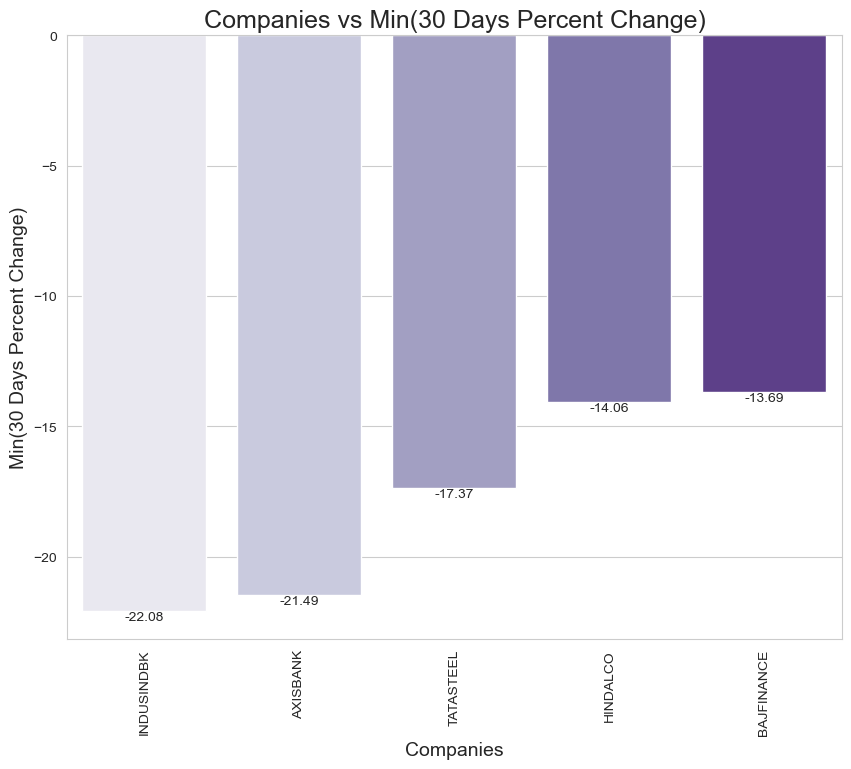

In [214]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(x='Symbol',y='30_day_percent_change',data=min_30day_percent_change,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Min(30 Days Percent Change)",fontsize=14)
plt.title("Companies vs Min(30 Days Percent Change)",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

In [161]:
data['30_day_percent_change'].sort_values(ascending=True).tail()

12    1.80
1     5.66
6     5.70
9     6.34
35    6.36
Name: 30_day_percent_change, dtype: float64

In [163]:
max_30day_percent_change=data.loc[[12,1,6,9,35]]
max_30day_percent_change

,Symbol,Open,High,Low,LTP,Chng,percent_change,volume_in_lakhs,Turnover_in_crores,52_weeks_high,52_weeks_low,365_day_percent_change,30_day_percent_change
12,DRREDDY,4580.00,4820.00,4576.15,4750.00,158.40,3.45,10.72,508.97,5614.60,4135.00,-1.17,1.80
1,ASIANPAINT,3101.00,3167.35,3091.00,3138.00,-6.25,-0.20,10.29,322.53,3505.00,2117.15,45.66,5.66
6,BHARTIARTL,763.00,763.00,733.10,735.85,-29.30,-3.83,111.43,830.06,781.80,454.11,58.55,5.70
9,CIPLA,892.00,976.05,890.65,965.00,65.05,7.23,144.59,1380.90,1005.00,726.50,31.89,6.34
35,POWERGRID,204.05,204.95,200.80,202.50,-1.75,-0.86,96.11,195.09,209.95,136.88,3.69,6.36


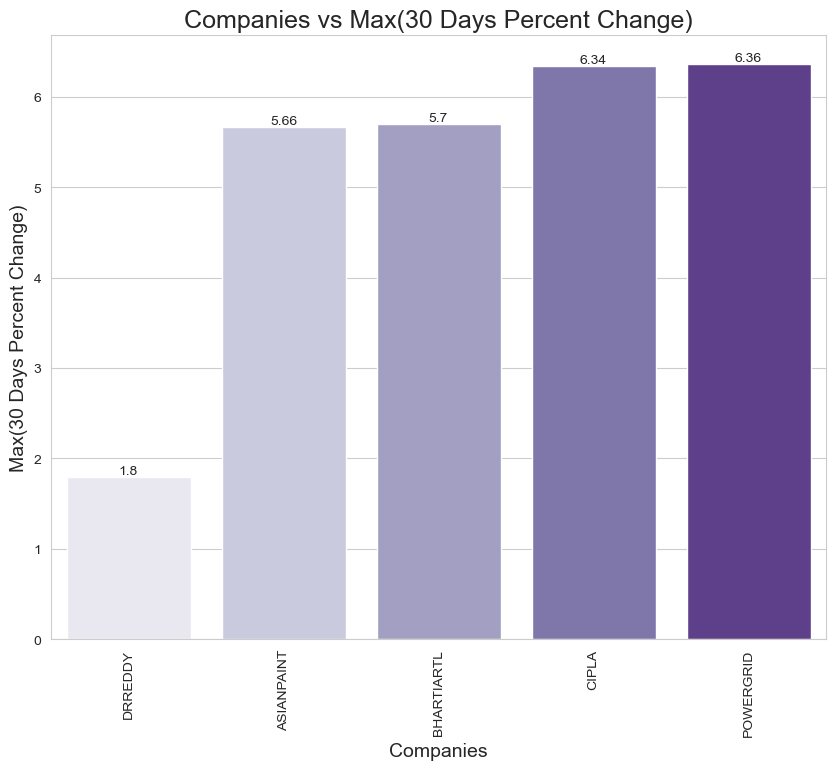

In [213]:
plt.figure(figsize=(10,8),dpi=100)
ax=sns.barplot(x='Symbol',y='30_day_percent_change',data=max_30day_percent_change,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Companies",fontsize=14)
plt.ylabel("Max(30 Days Percent Change)",fontsize=14)
plt.title("Companies vs Max(30 Days Percent Change)",fontsize=18)

for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:>

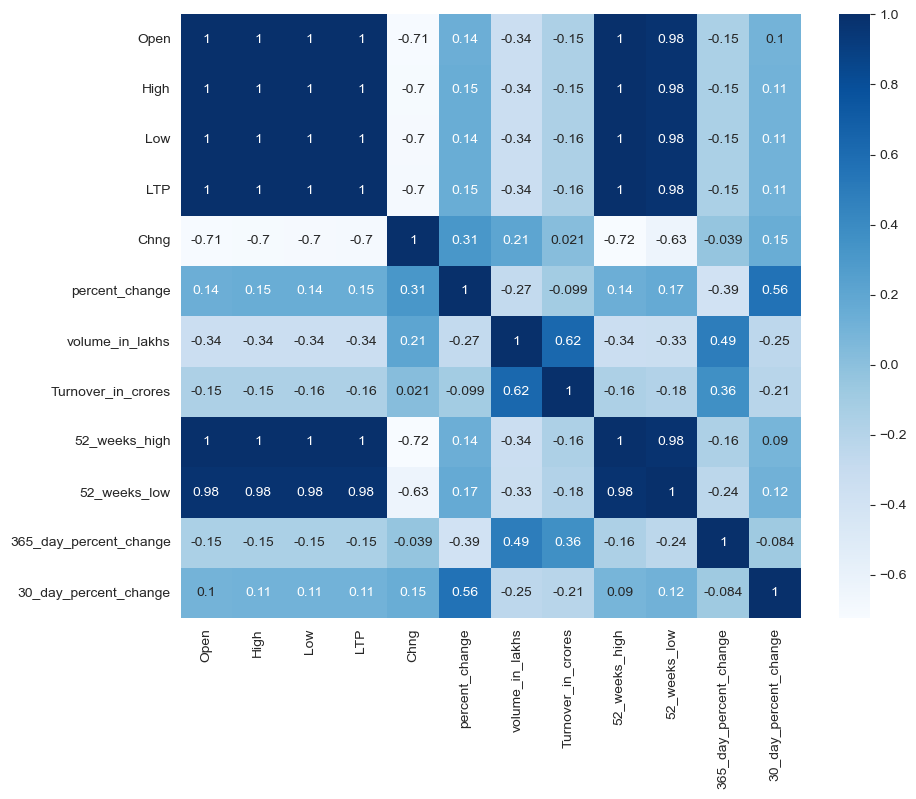

In [219]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(data.corr(),annot=True,cmap="Blues")

* The above heatmap graph shows that how one factor is correlated with the other factor .
* Correlation value 1 , shows a positive correlation of one factor with other.
* Correlation values lies between -1 to +1.
    * Where -1 means , negative correlation.
    * And +1 shows , positive correlation .

### Thank You !!